In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
pd.set_option('display.max_rows', 10000)

In [14]:
list_daerah = ['aceh', 'bali', 'banten', 'bengkulu', 'diy', 'dki_jakarta', 'gorontalo', 'jabar', 'jambi', 'jateng', 'jatim', 
              'kalbar', 'kalsel', 'kalteng', 'kaltim', 'kalut', 'kepri', 'kepulauan_bangka_belitung', 'lampung', 'maluku',
               'malut', 'ntb', 'ntt', 'papua', 'papua_barat', 'riau', 'sulbar', 'sulsel', 'sulteng', 'sultra', 'sulut', 
               'sumbar', 'sumsel', 'sumut']



#changing xls to csv for each file:
"""for i in range(len(list_daerah)):
    df = pd.read_excel(list_daerah[i]+'.xls')
    df = df.loc[[0, 7, 9, 12, 14, 16, 18, 21, 24, 28]].reset_index(drop=True)
    cols = (df != '-').any()
    df = df[cols[cols].index]
    df.to_csv(list_daerah[i]+'.csv')
"""
all_data_frame = {}
drop_index = [1, 2, 3, 4, 5, 6, 8, 10, 11, 13, 15, 17, 19, 20, 22, 23, 25, 26, 27, 29, 30]
for i in list_daerah:
    all_data_frame[i] = pd.read_csv(i +'.csv')
    #all_data_frame[i] = all_data_frame[i].loc[[0, 7, 9, 12, 14, 16, 18, 21, 24, 28]].reset_index(drop=True)
    #all_data_frame[i].drop(drop_index)#.reset_index(drop=True)
    all_data_frame[i] = all_data_frame[i].drop(columns='Unnamed: 0')
    all_data_frame[i] = all_data_frame[i].drop(columns='No.')
    all_data_frame[i].rename(columns={'Komoditas(Rp)': 'Komoditas'}, inplace=True)
    #all_data_frame[i] = all_data_frame[i][all_data_frame[i] != '-']
    #all_data_frame[i] = all_data_frame[i].drop(['17/04/2019', '05/06/2019','06/06/2019', '07/06/2019' , '25/10/2019', ], 1)
    #deleting entire columns that the values is '-'
    #all_data_frame[i] = all_data_frame[i].loc[:, ~(all_data_frame[i] == '-').all()]
    #cols = (all_data_frame[i] != '-').any()
    #all_data_frame[i] = all_data_frame[i][cols[cols].index]
    
#print(all_data_frame['aceh'])
#for i in list_daerah:
    #print(all_data_frame[i].dtypes)
#setelah dicek manual dengan capek sangat, dimana setiap frame di print dtypes nya, dan di search yang mana type object
#ditemukan iregular data bahwa tanggal 20 agustus 2019, di papua barat tidak ada harga daging sapi, 
#sementara bahan pokok lain ada, oleh sebab itu untuk sementara 
#kolom tanggal 20/08/2019 akan dihapus di papua barat
all_data_frame['papua_barat'] = all_data_frame['papua_barat'].drop('20/08/2019', 1)
#print(all_data_frame['kalsel'])

all_data_frame_melt = {}
for i in list_daerah:
    all_data_frame_melt[i] = pd.melt(frame=all_data_frame[i], id_vars=['Komoditas'], var_name='Tanggal', value_name='Harga')
    #change to datetime
    all_data_frame_melt[i]['Tanggal'] = pd.to_datetime(all_data_frame_melt[i]['Tanggal'], dayfirst=True, utc=False)
    all_data_frame_melt[i] = all_data_frame_melt[i].sort_values(by=['Komoditas', 'Tanggal']).reset_index(drop=True)
    all_data_frame_melt[i]['Harga'] = pd.to_numeric(all_data_frame_melt[i]['Harga'], downcast='integer')
#print(all_data_frame_melt['kalsel'])

all_data_frame_pivot = {}
for i in list_daerah:
    all_data_frame_pivot[i] = all_data_frame_melt[i].pivot(columns = 'Komoditas', index='Tanggal', values = 'Harga').reset_index()
    #all_data_frame_pivot[i]['Hari'] = all_data_frame_pivot[i].Tanggal.str.split('/', expand=True)[0]
    all_data_frame_pivot[i]['Hari'] = all_data_frame_pivot[i]['Tanggal'].dt.day
    #all_data_frame_pivot[i]['Bulan'] = all_data_frame_pivot[i].Tanggal.str.split('/', expand=True)[1]
    all_data_frame_pivot[i]['Bulan'] = all_data_frame_pivot[i]['Tanggal'].dt.month
#print(all_data_frame_pivot['jatim'])   

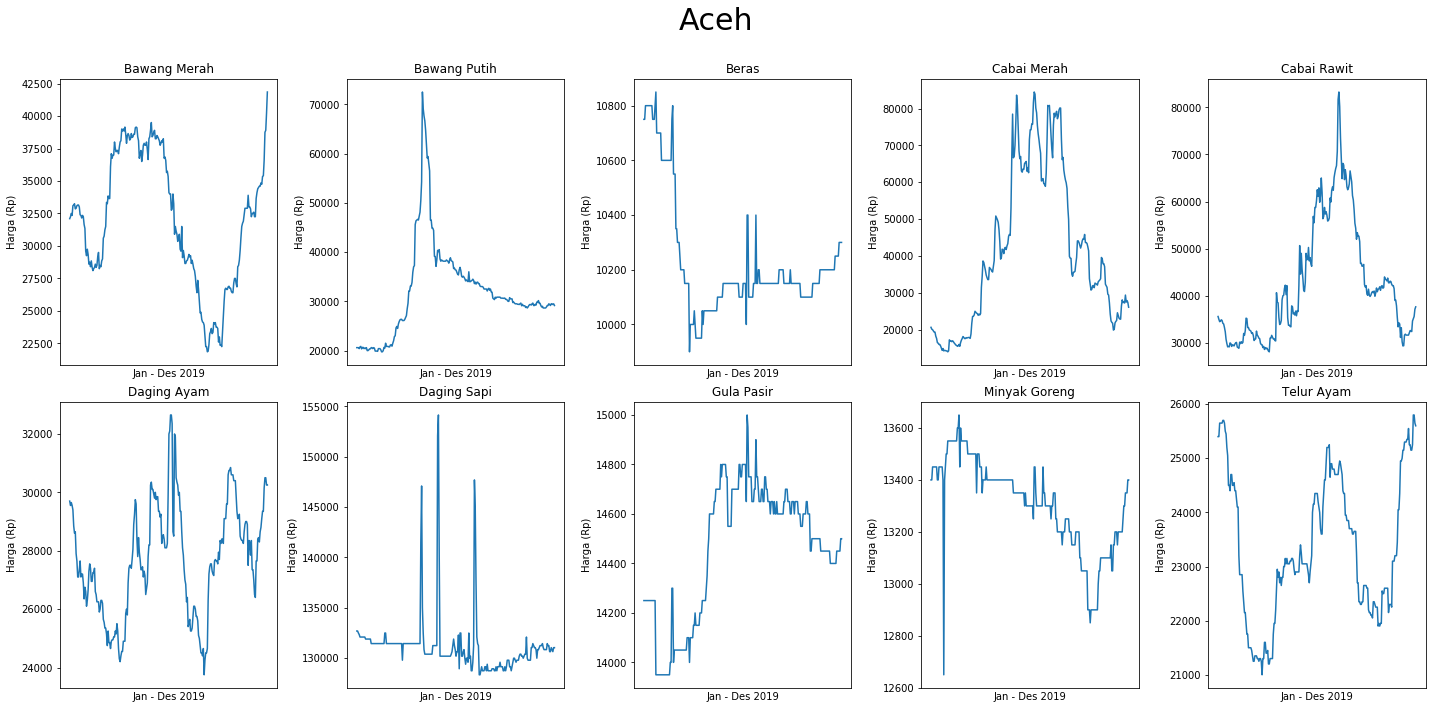

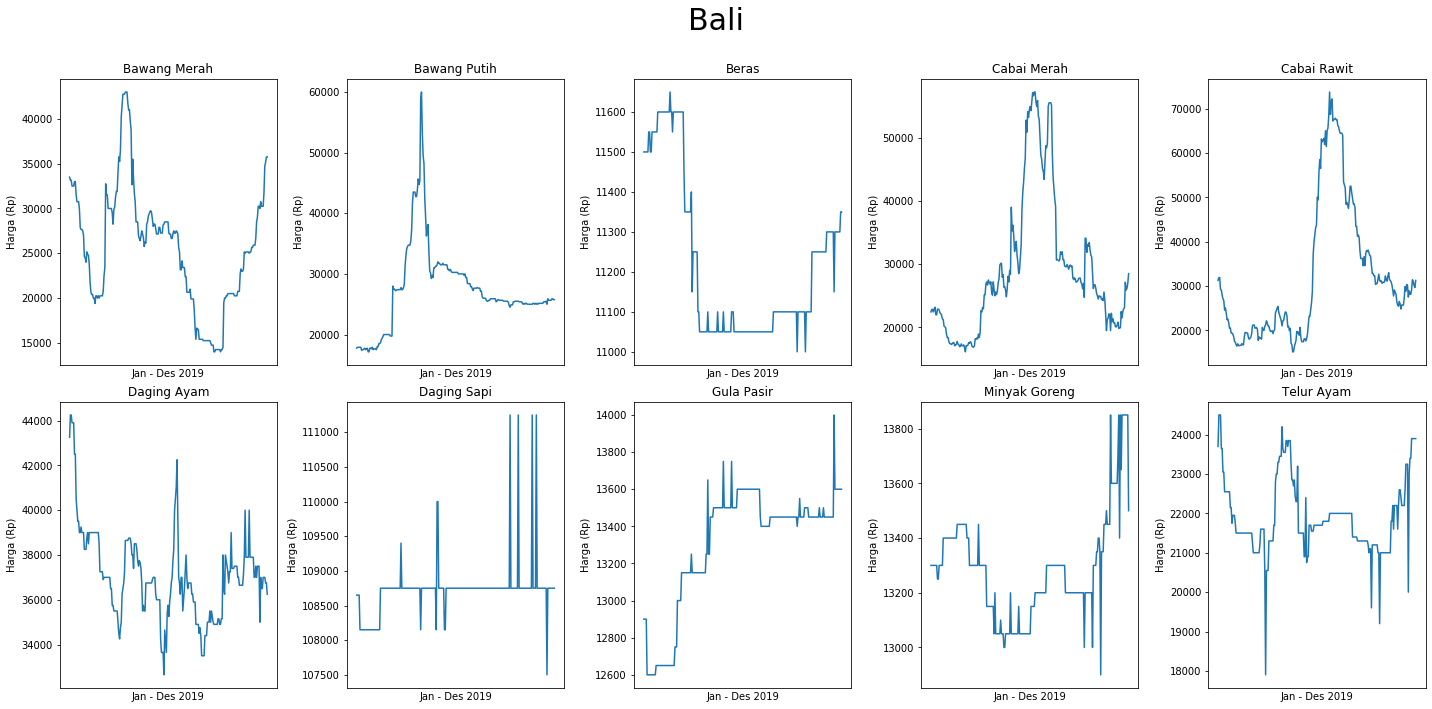

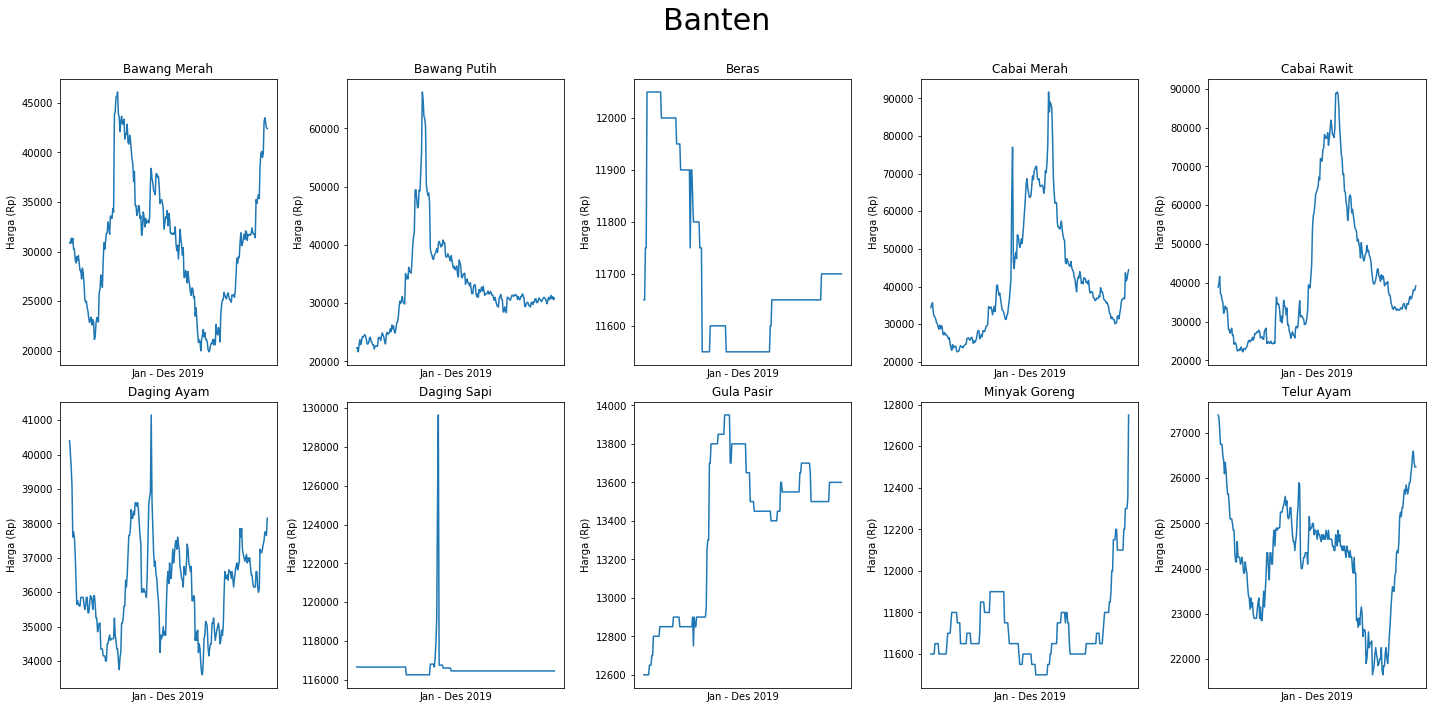

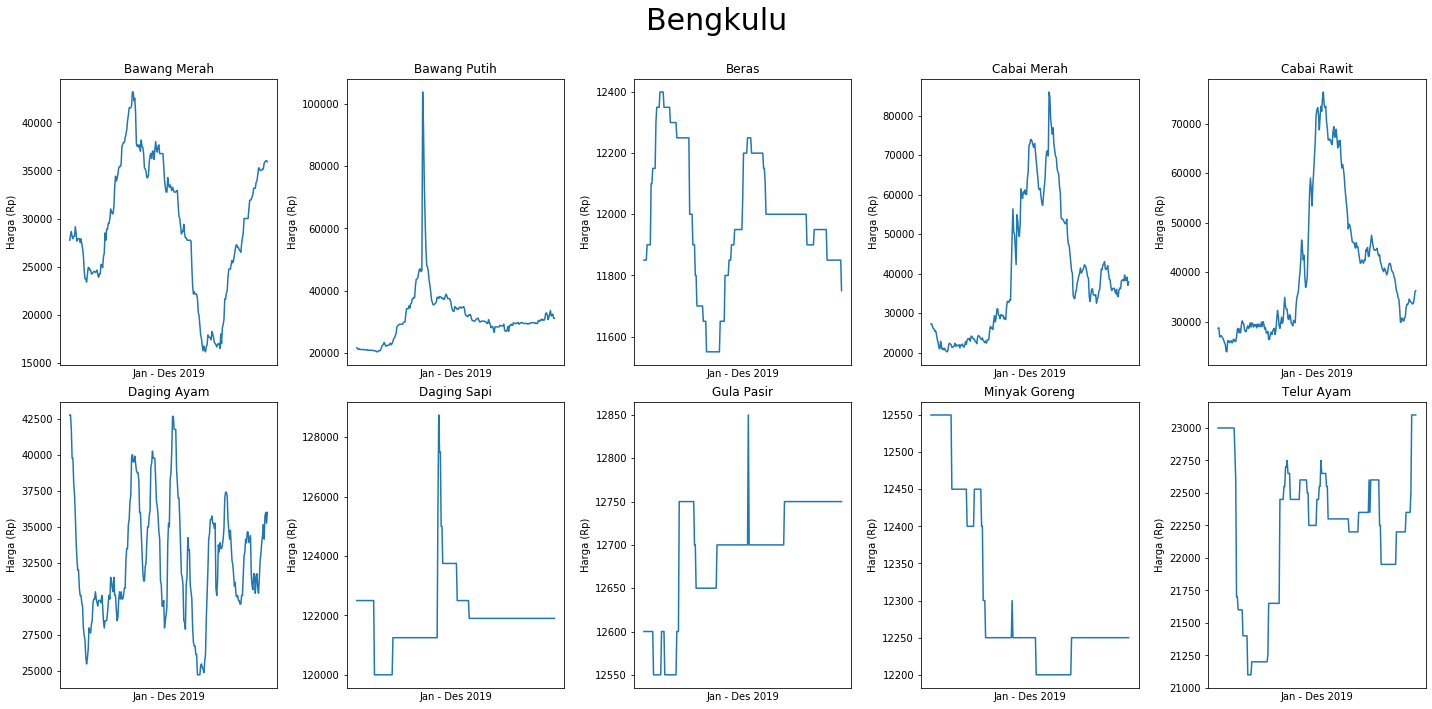

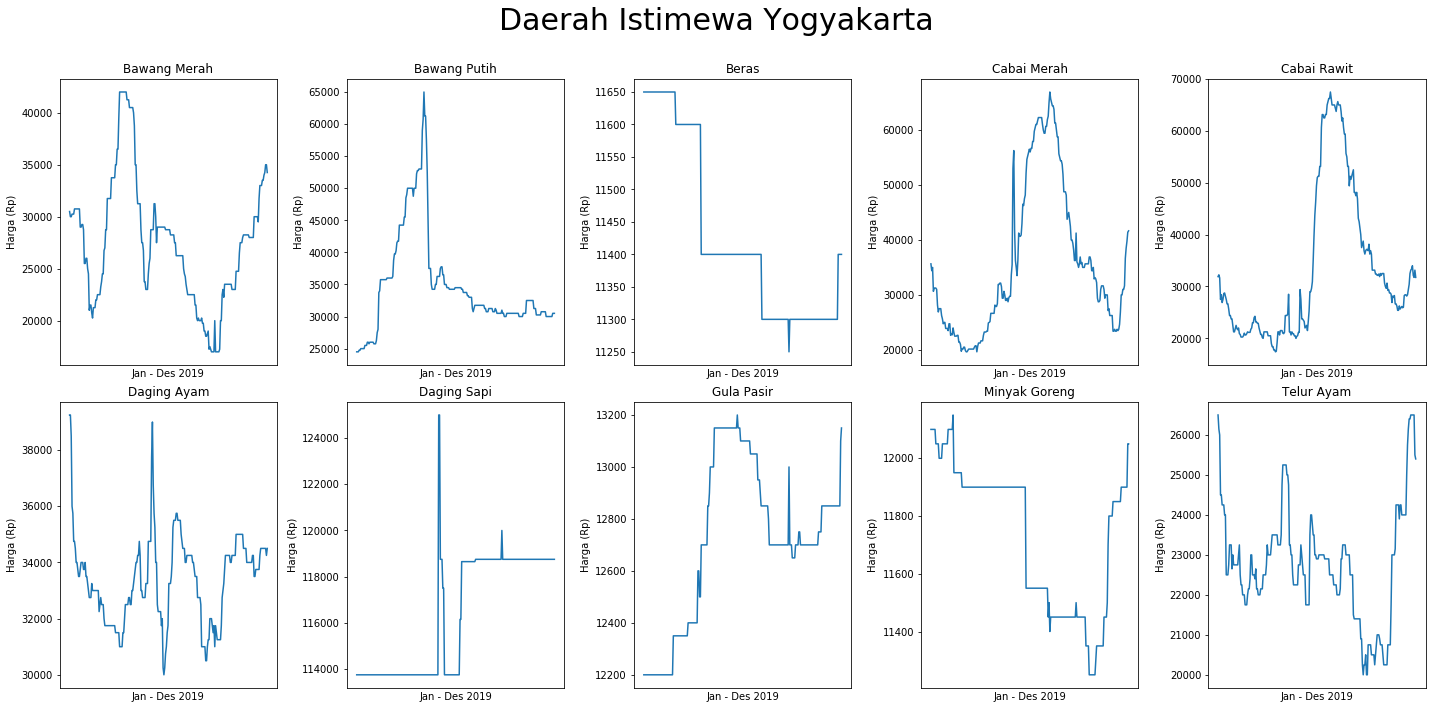

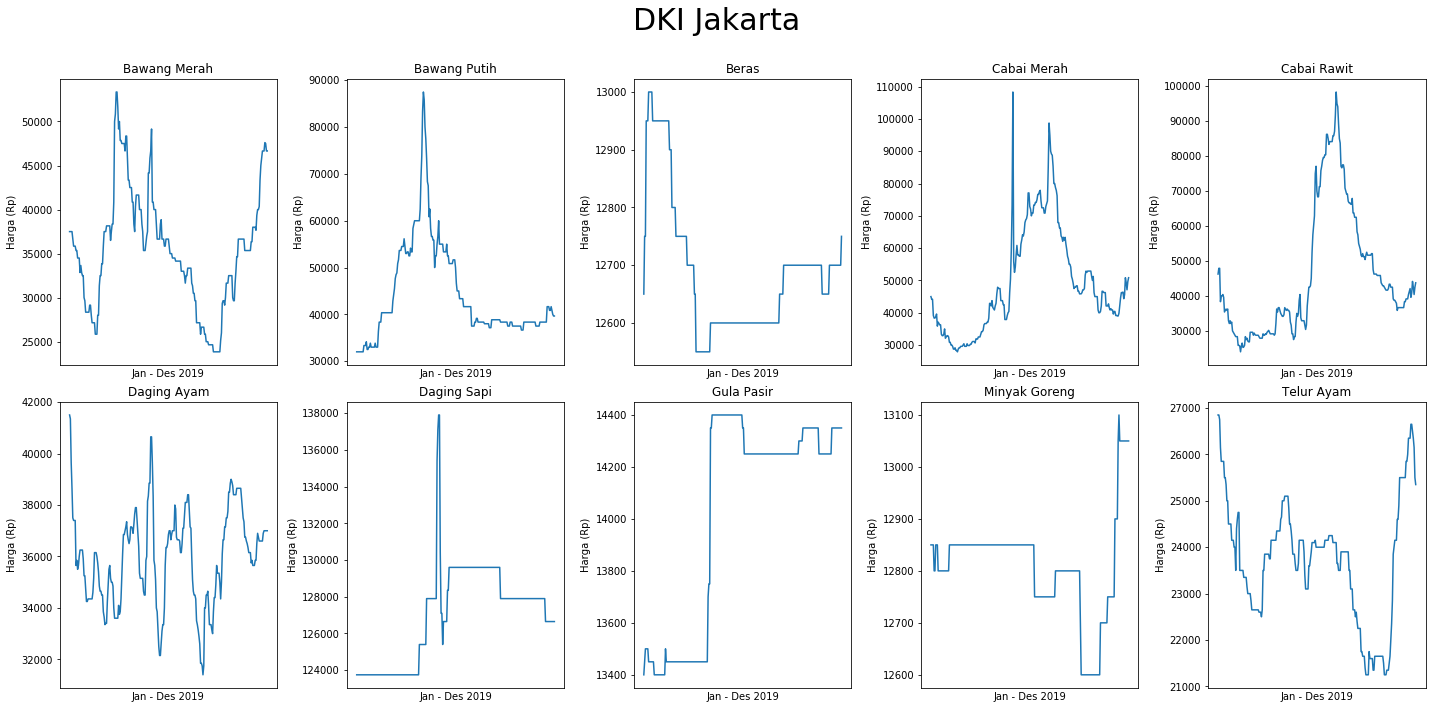

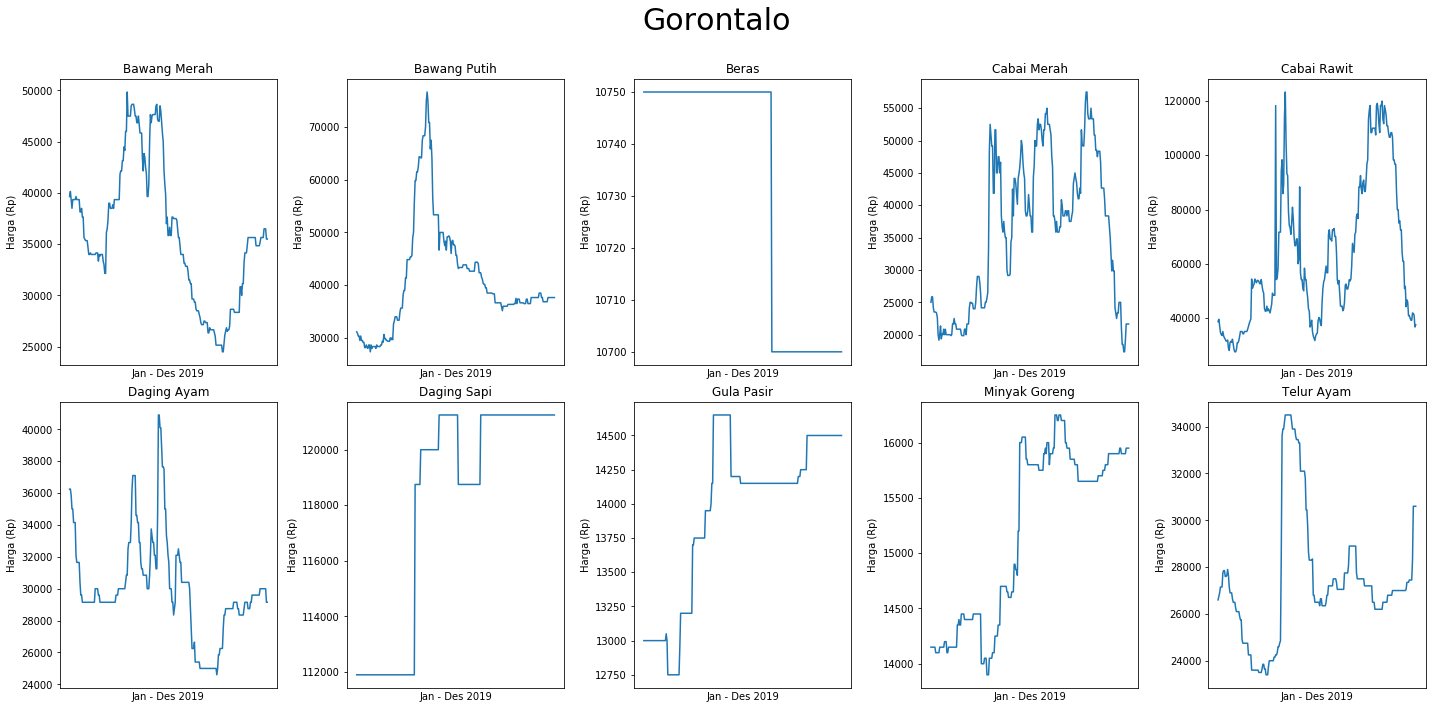

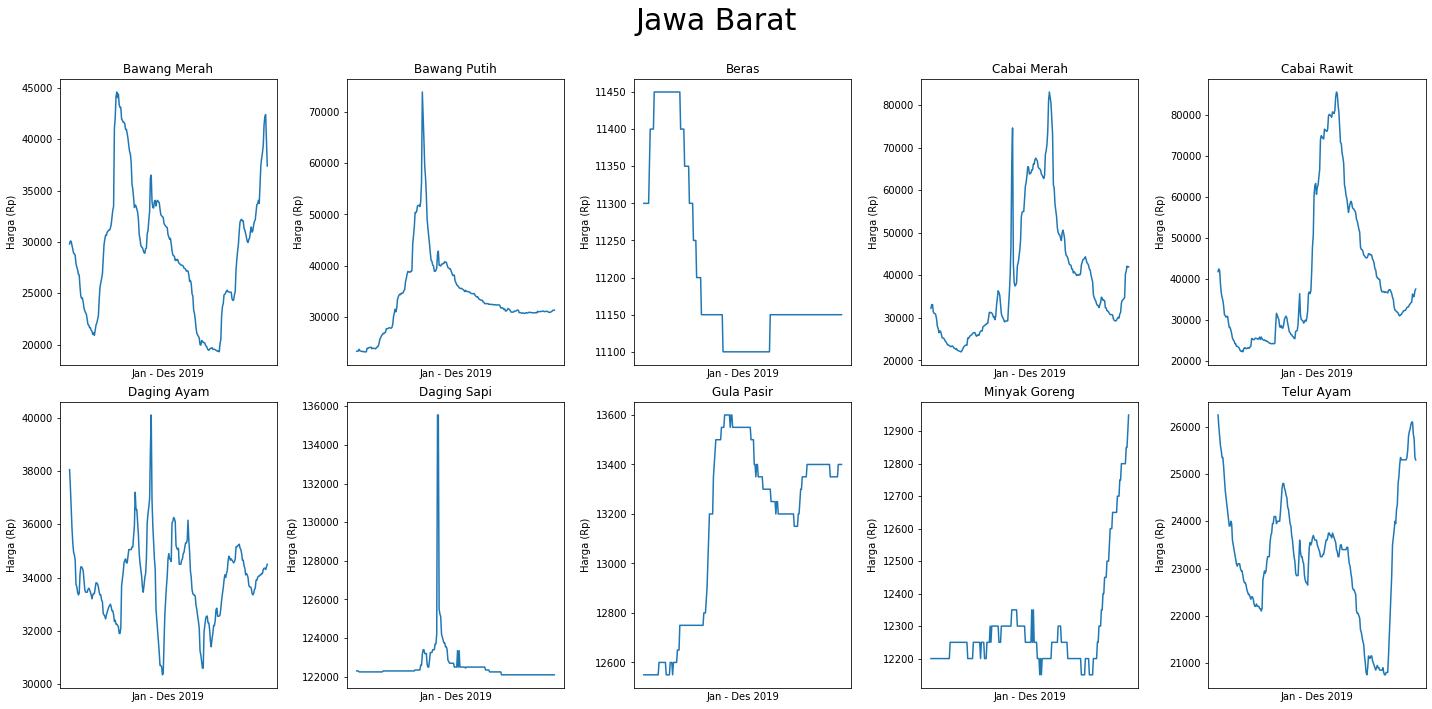

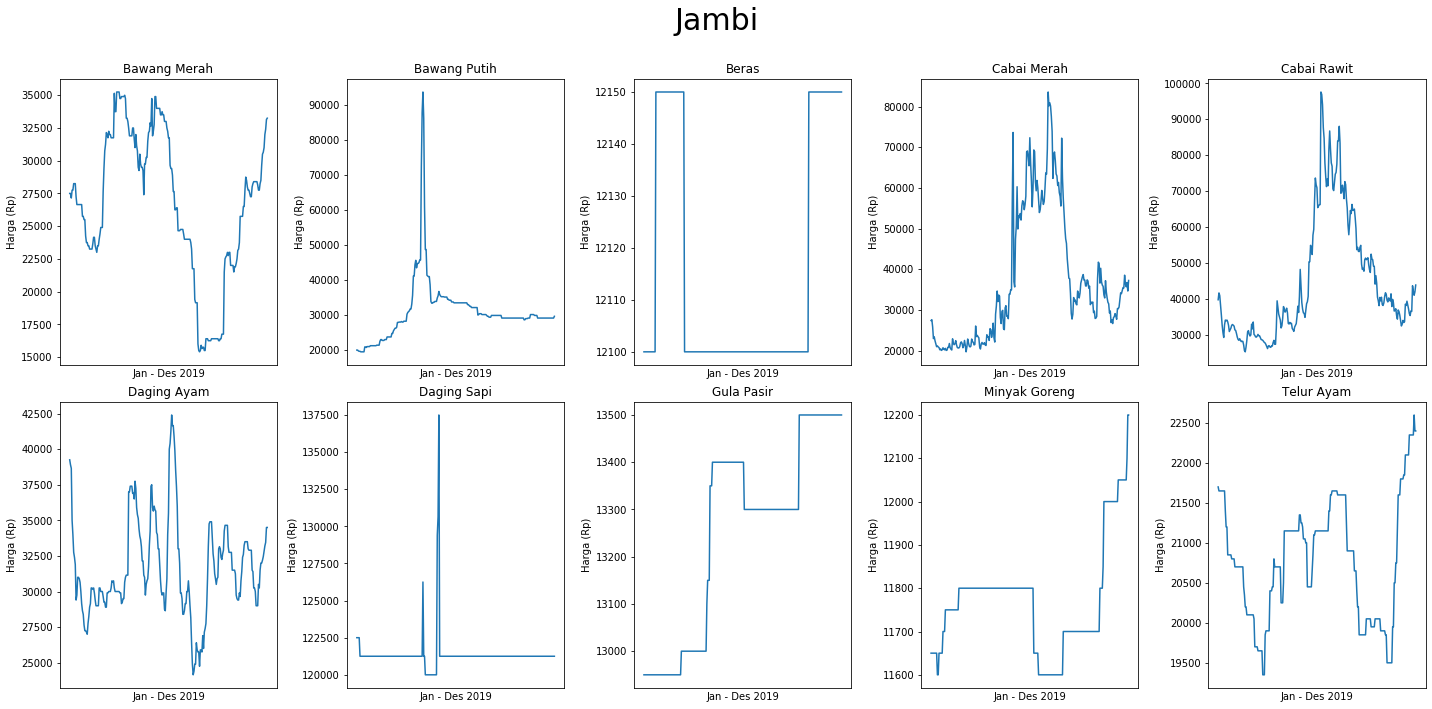

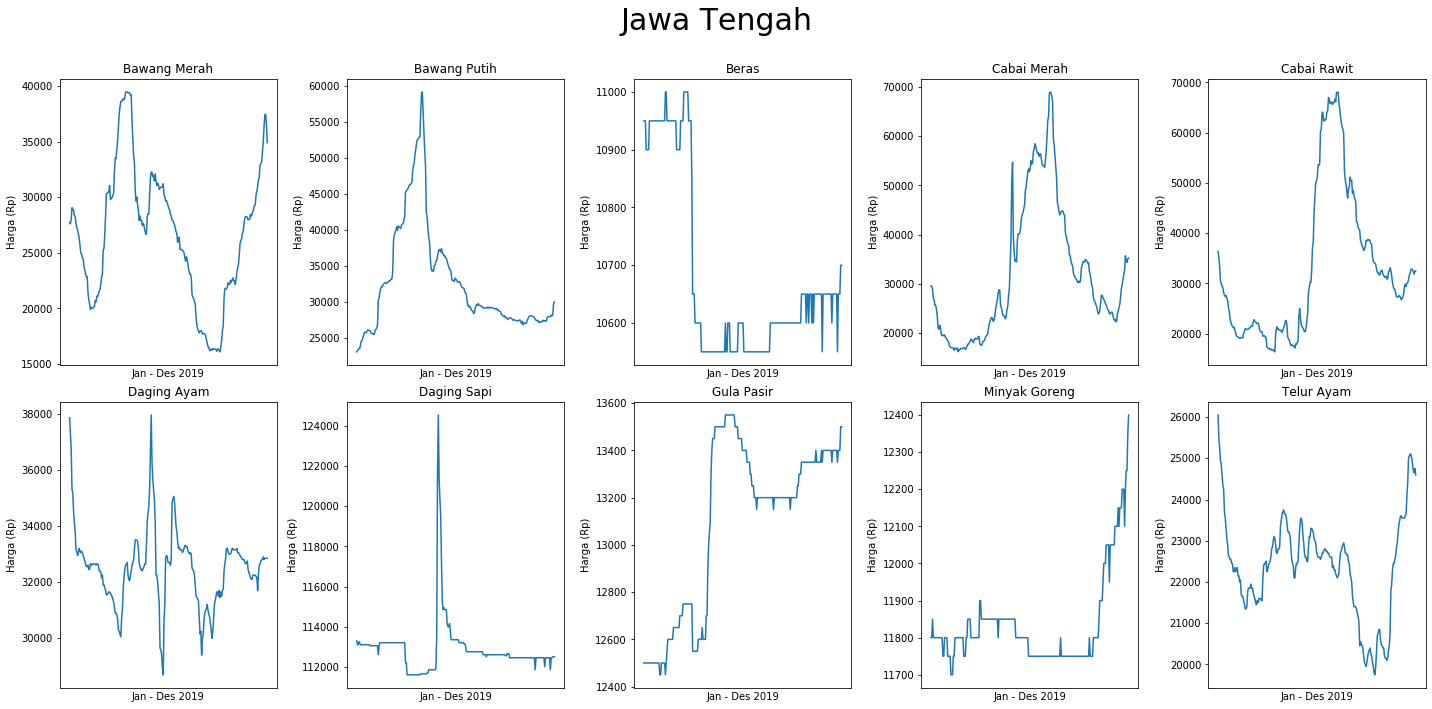

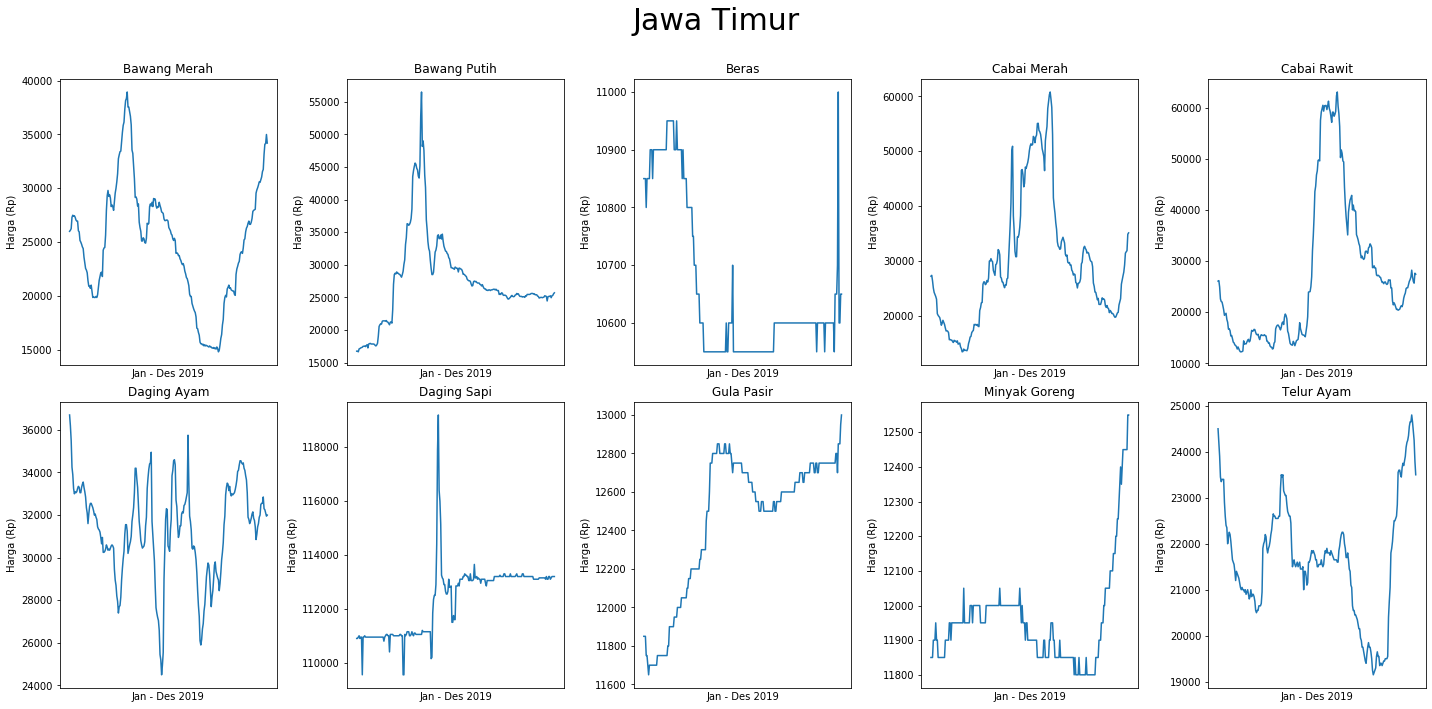

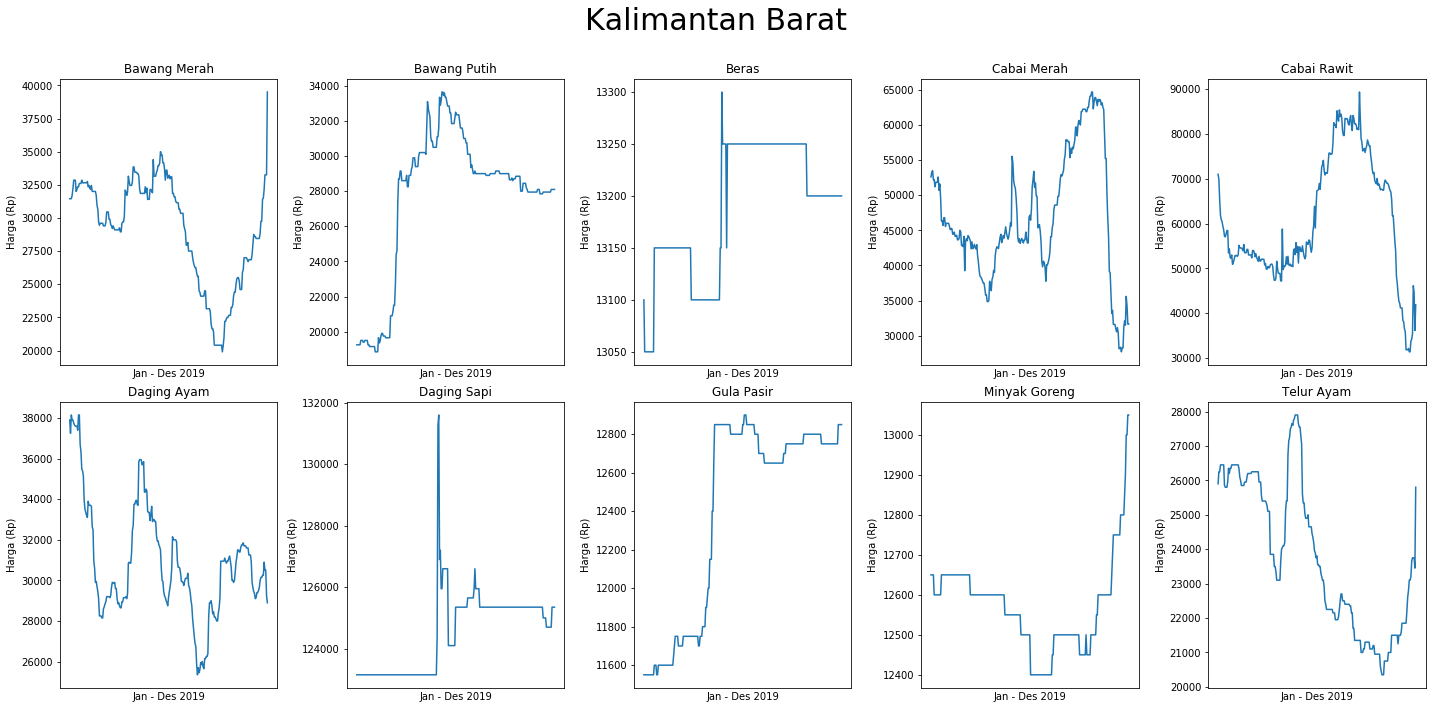

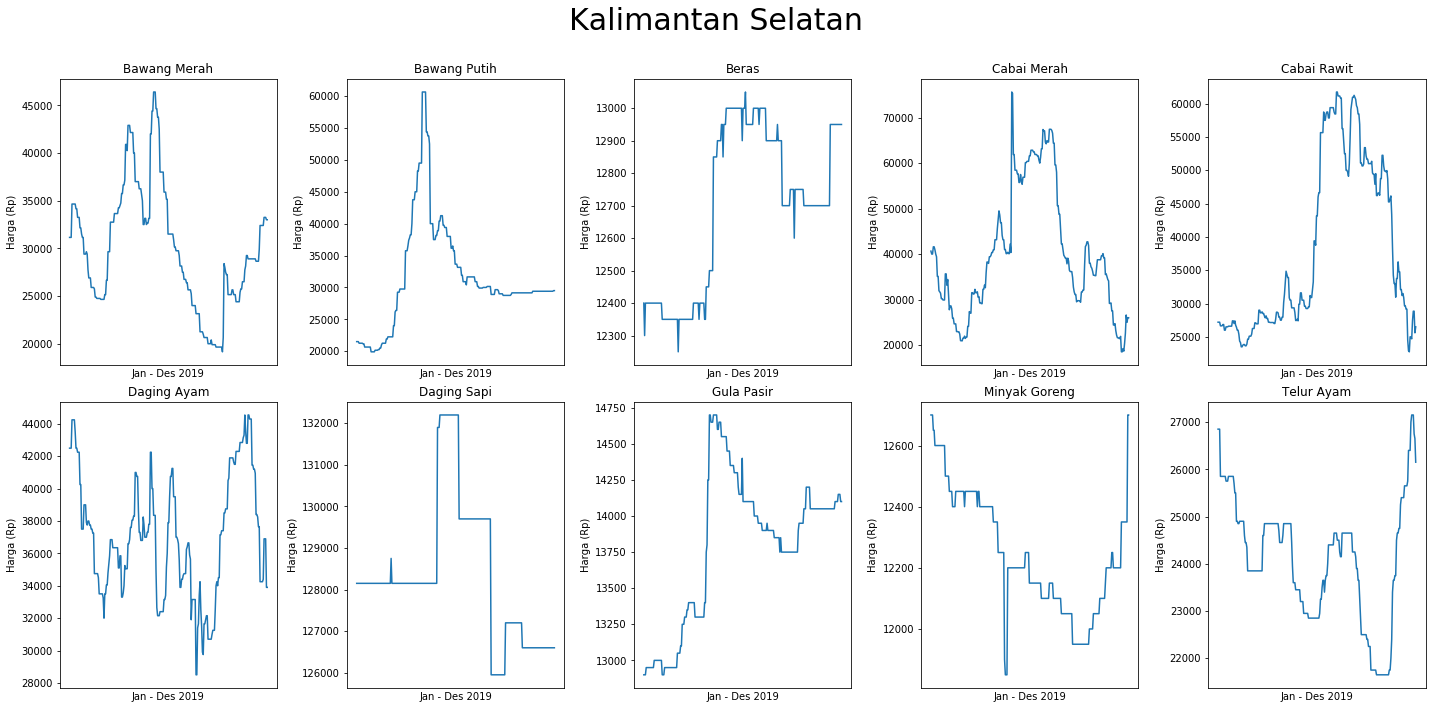

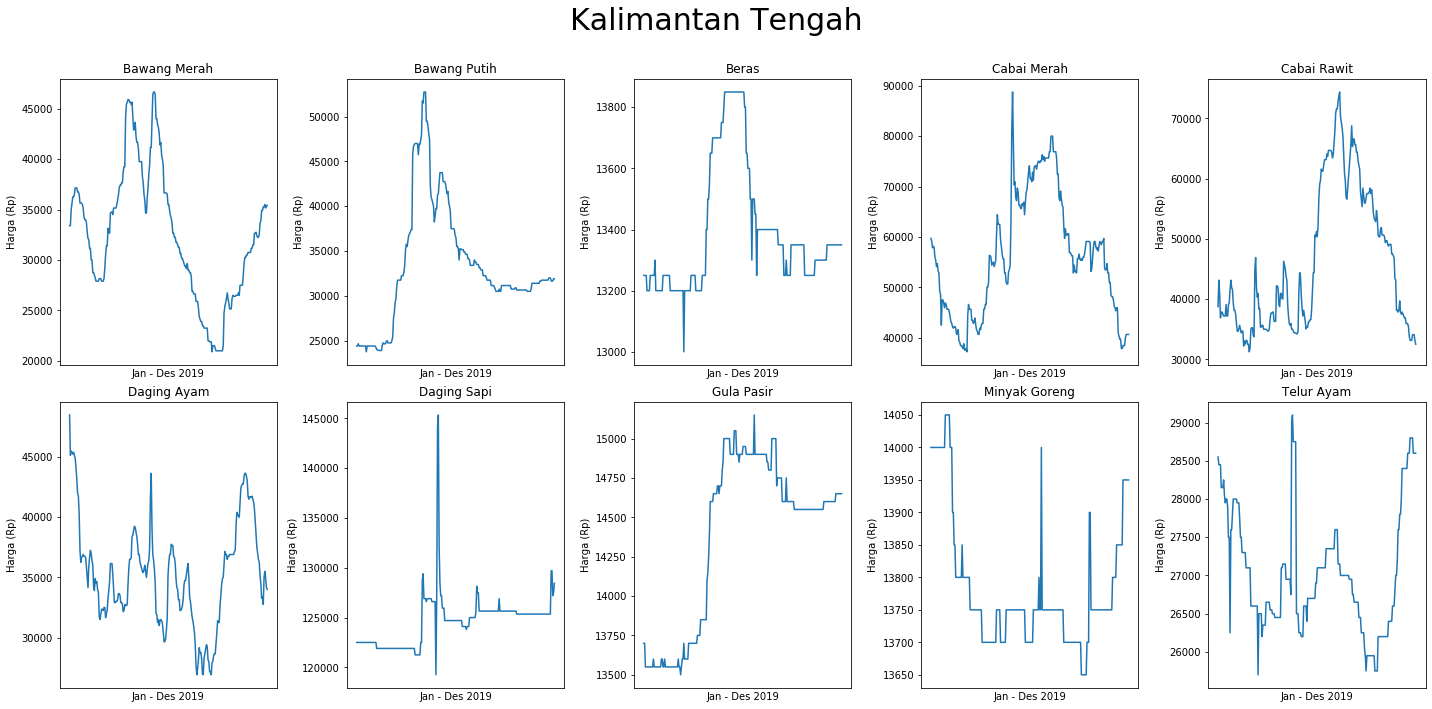

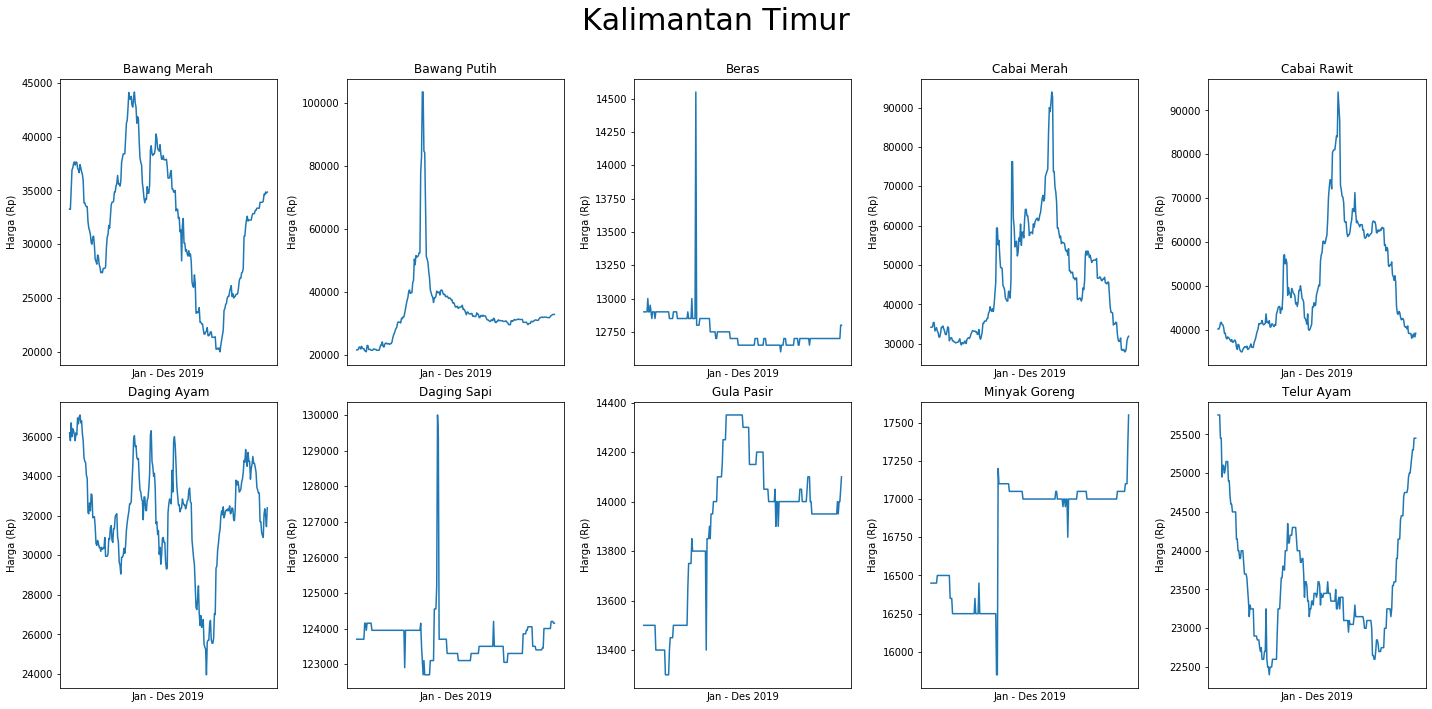

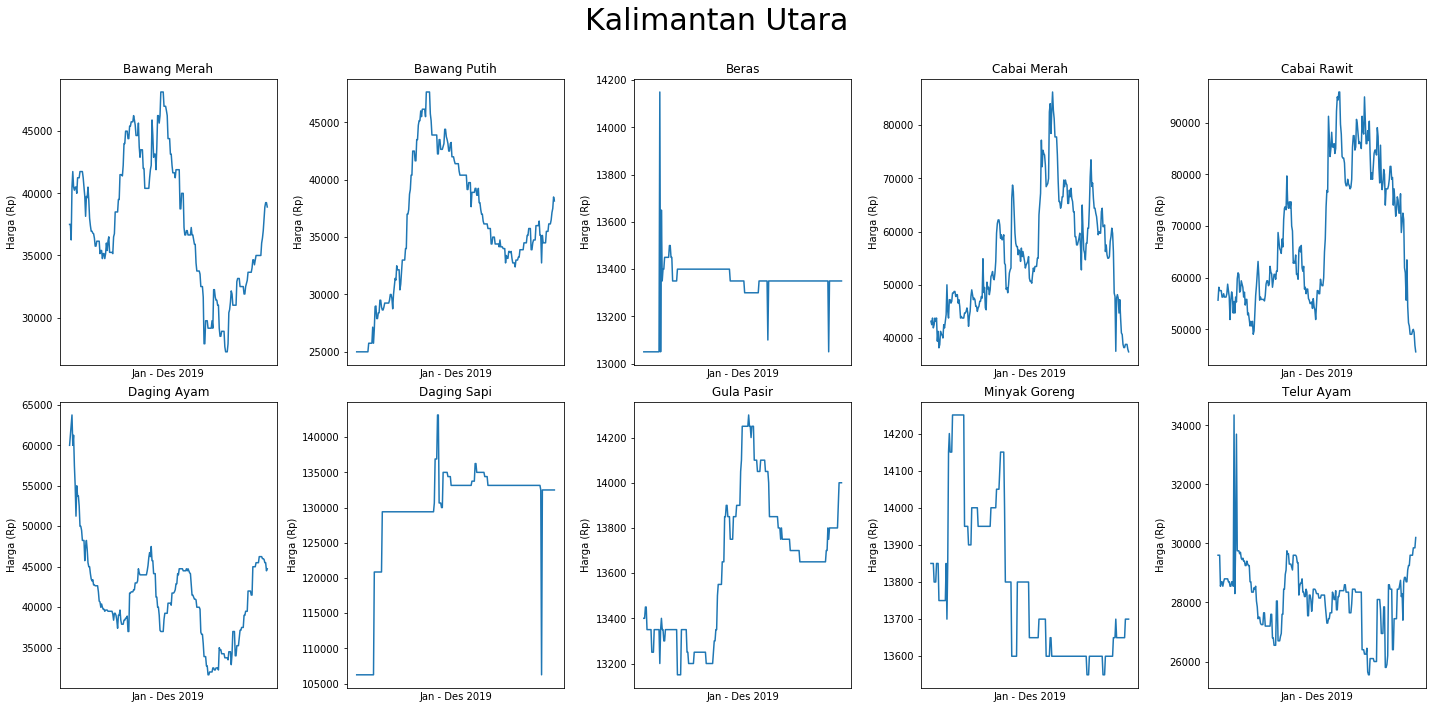

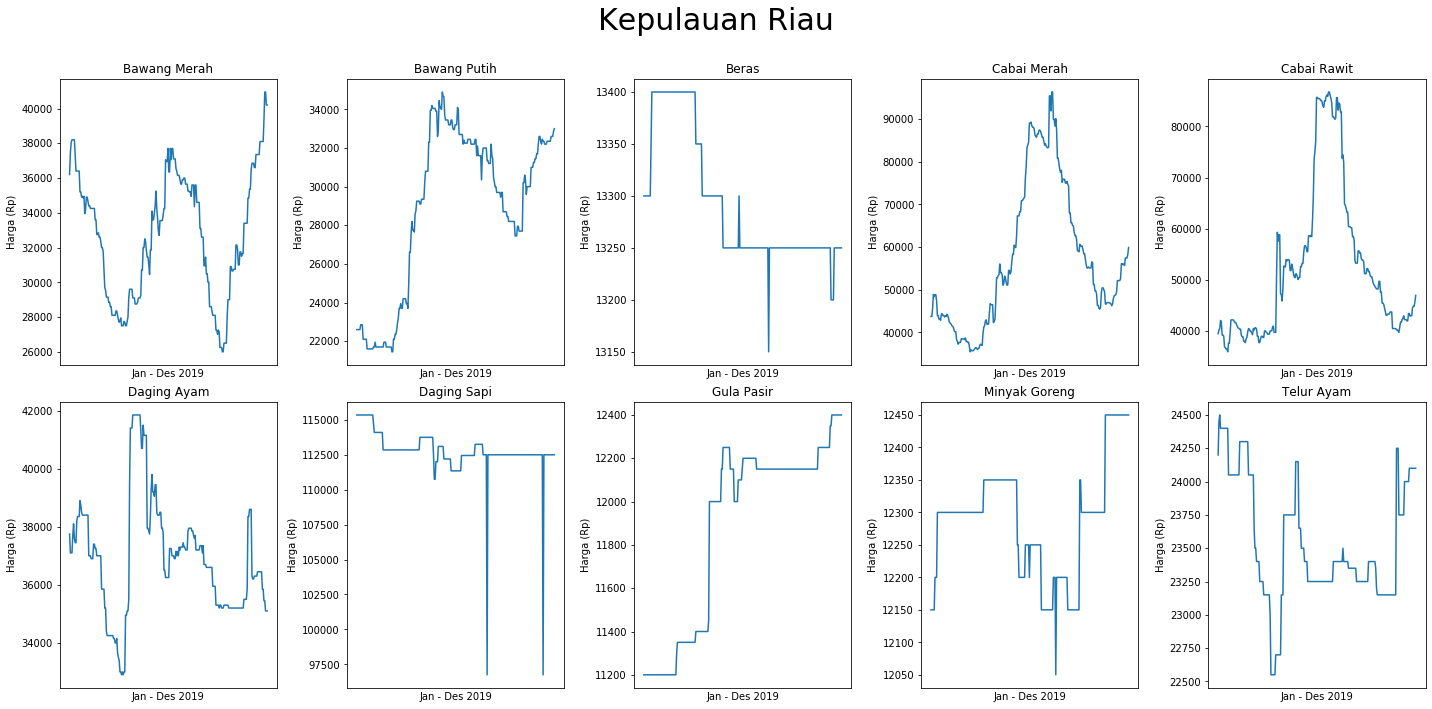

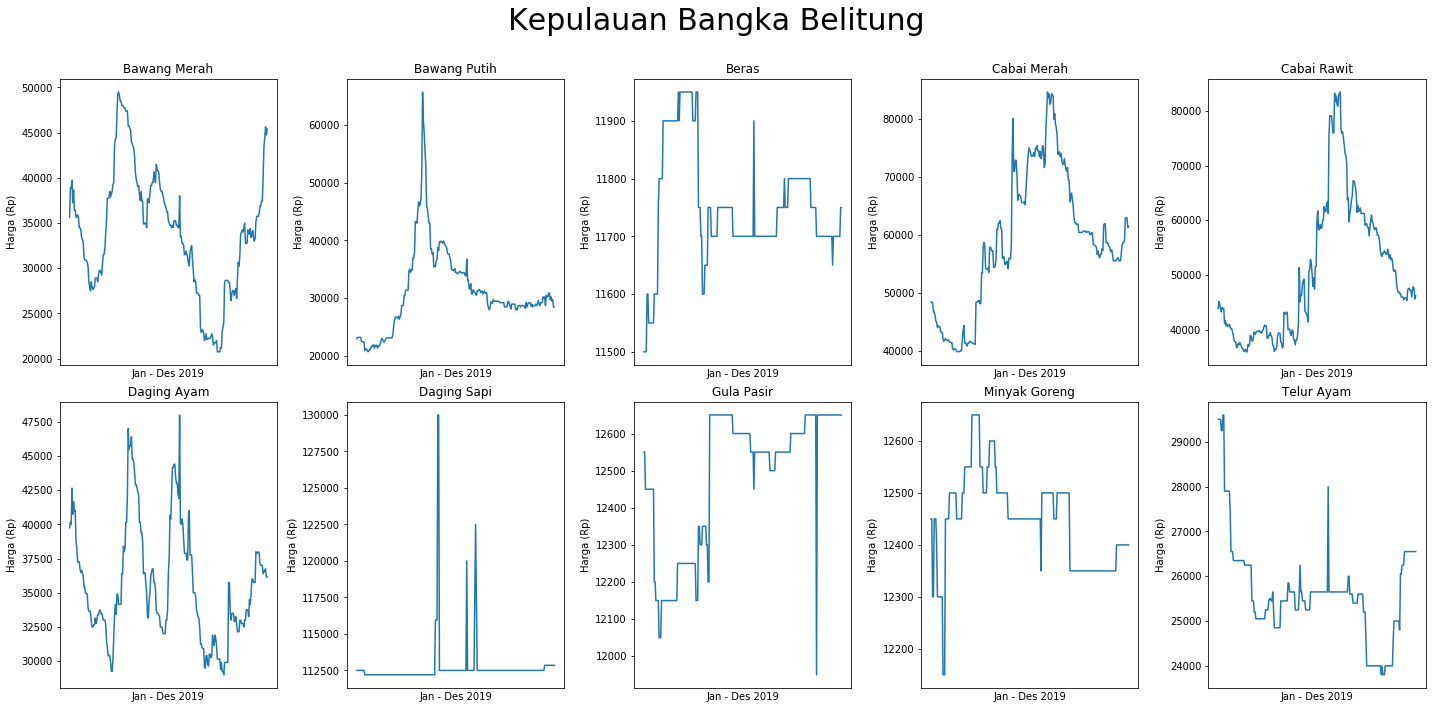

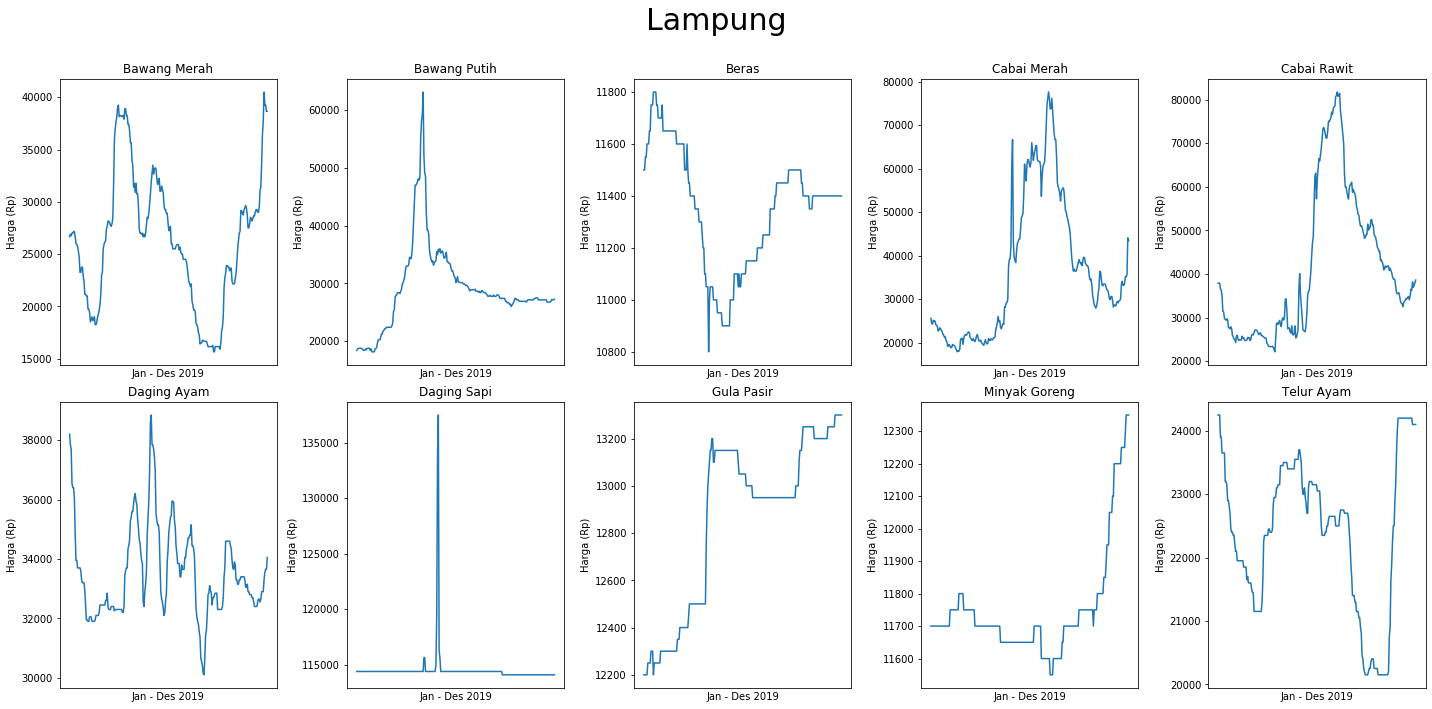

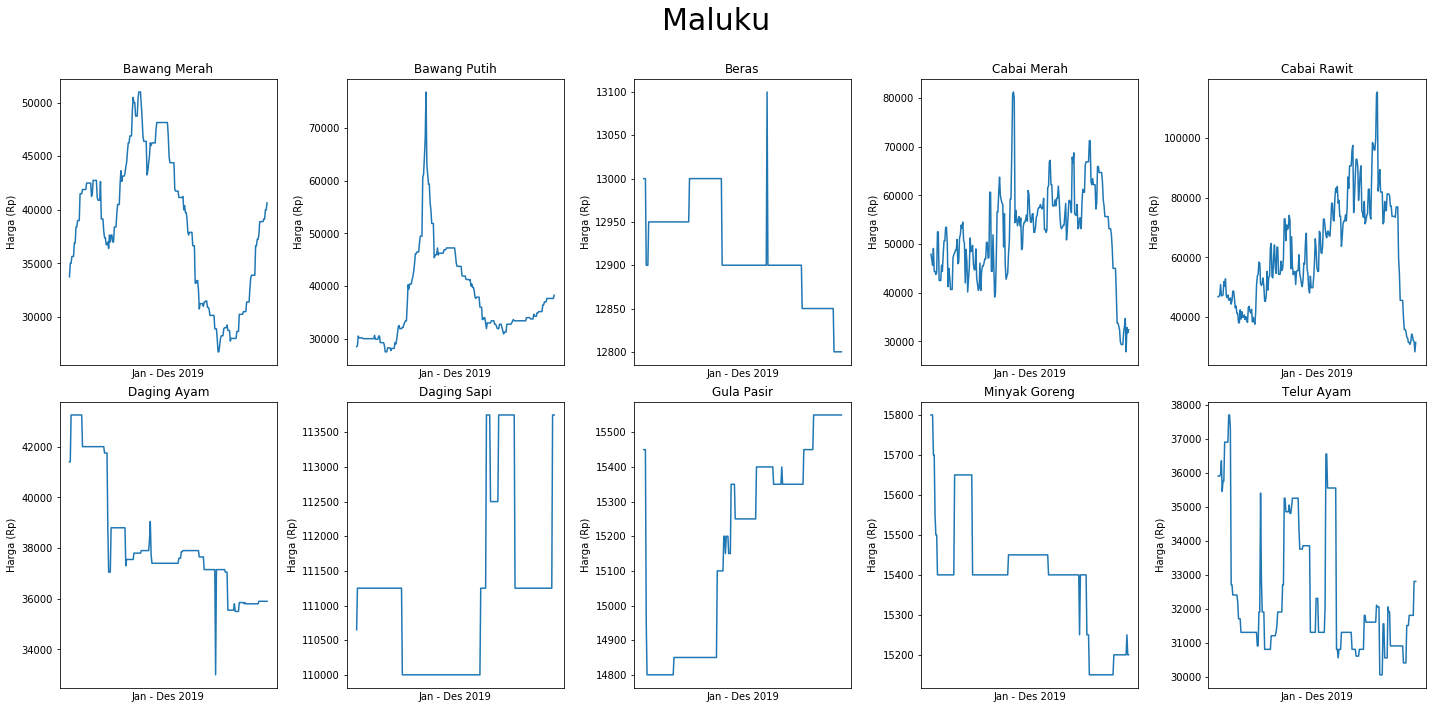

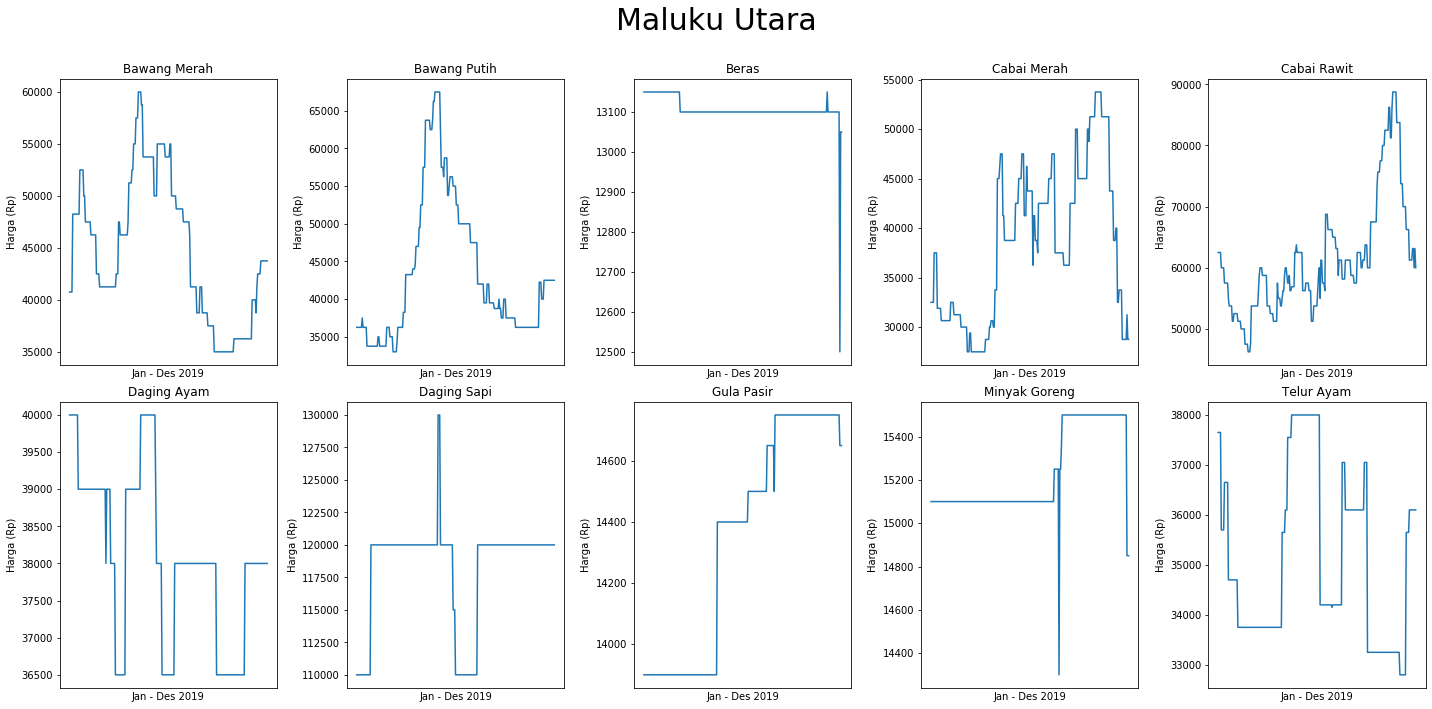

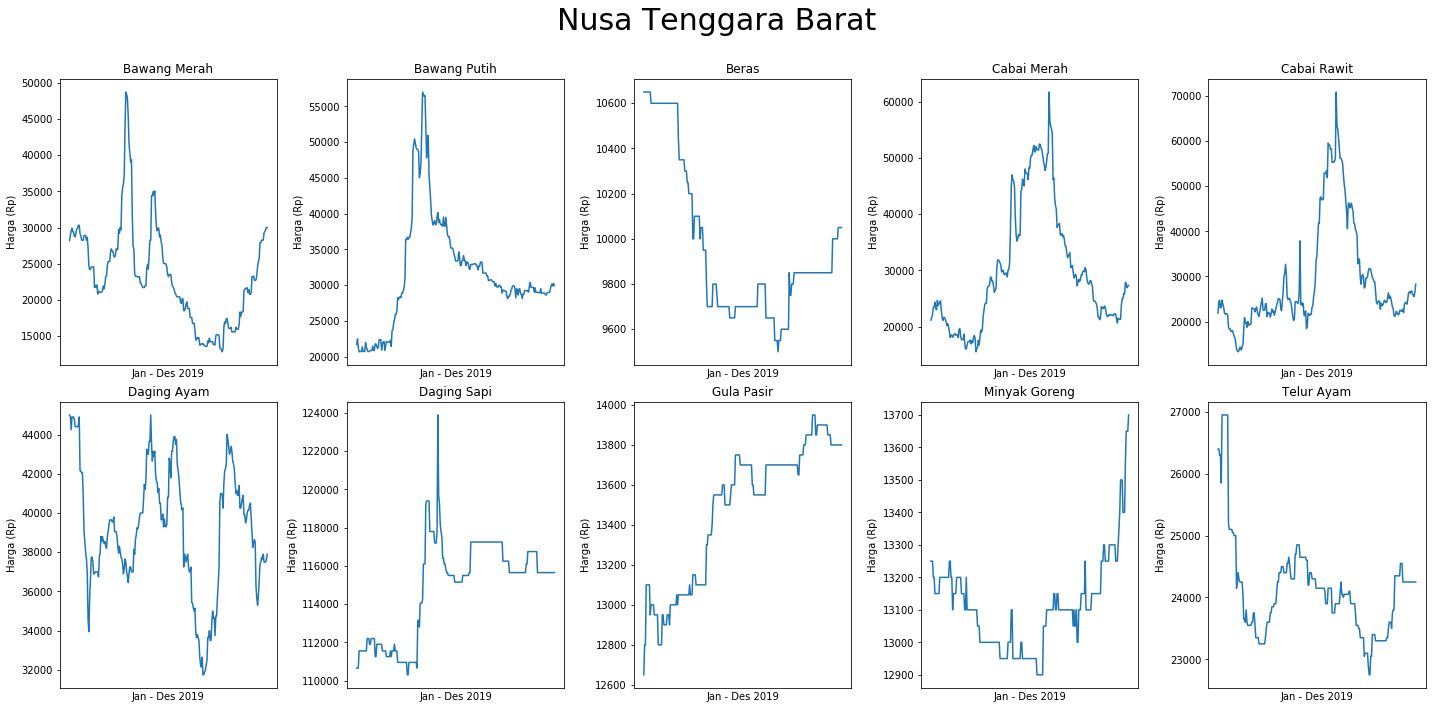

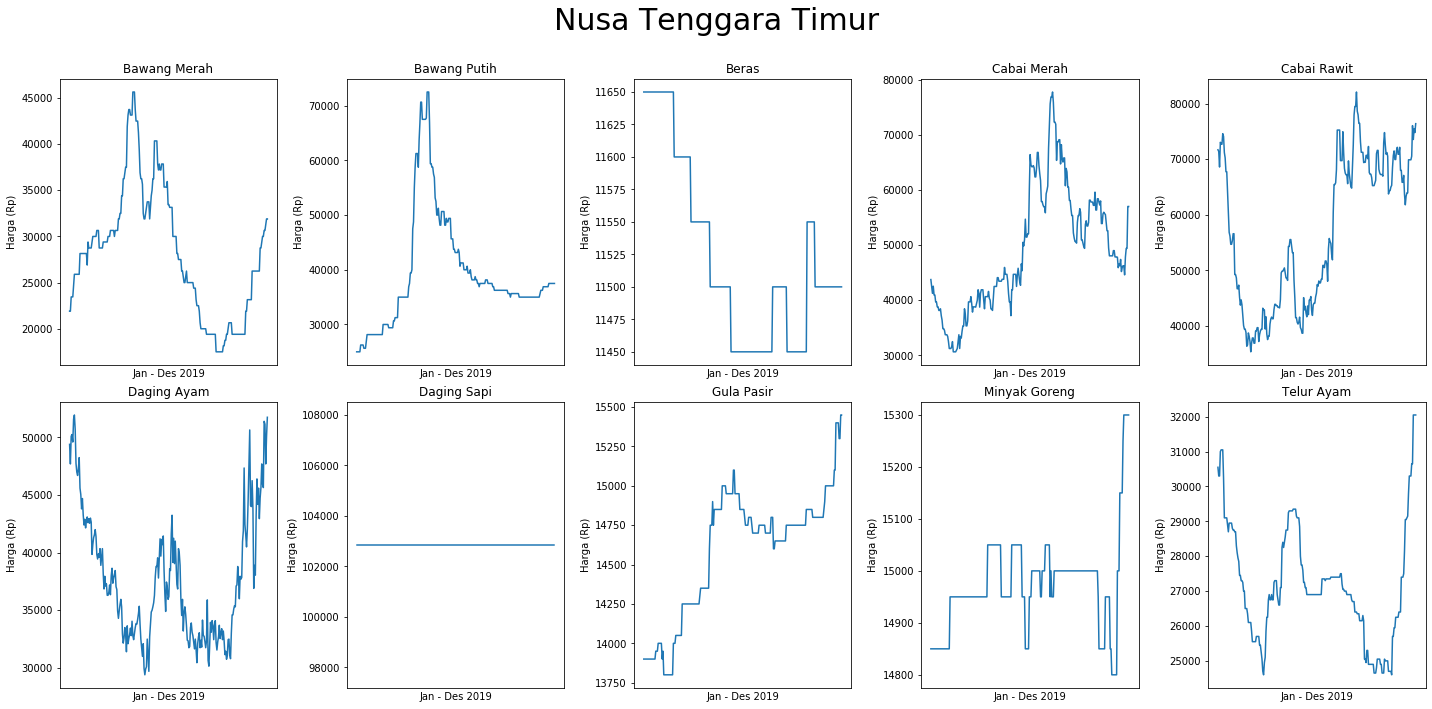

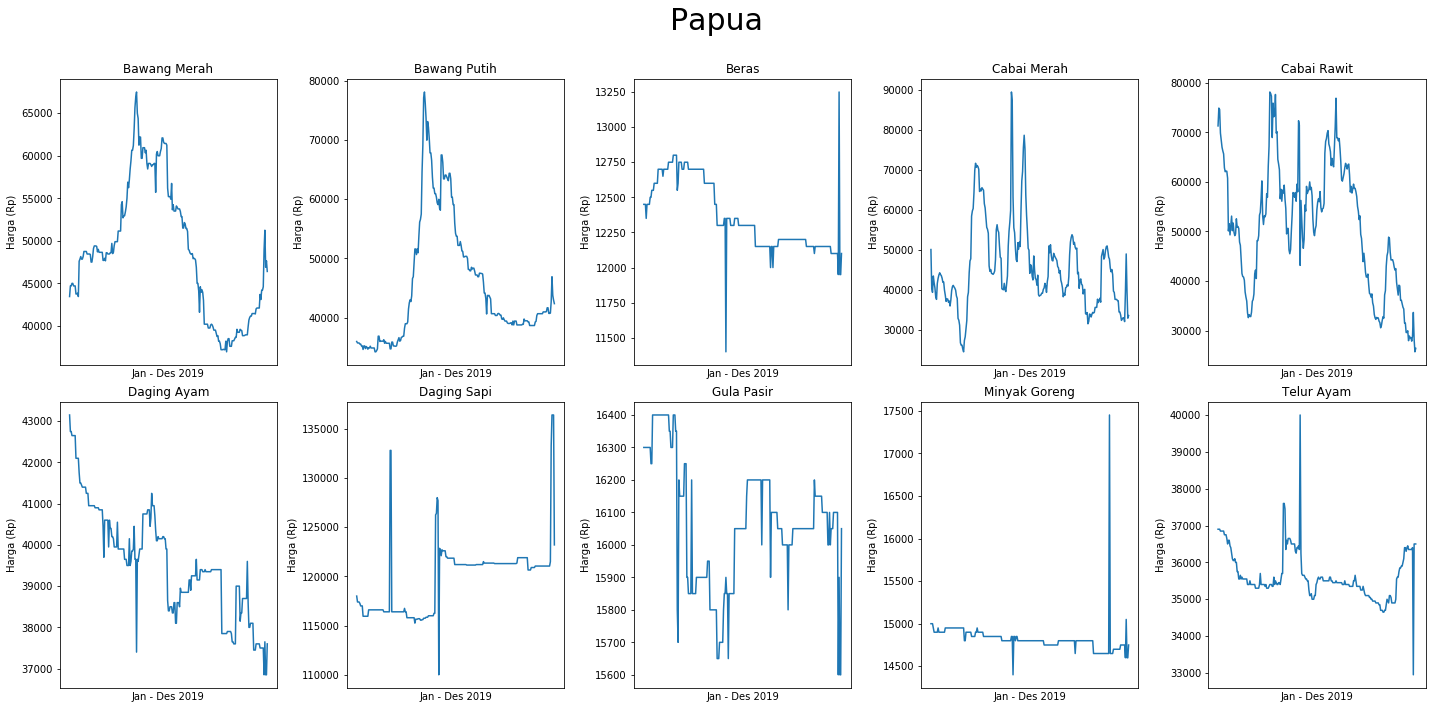

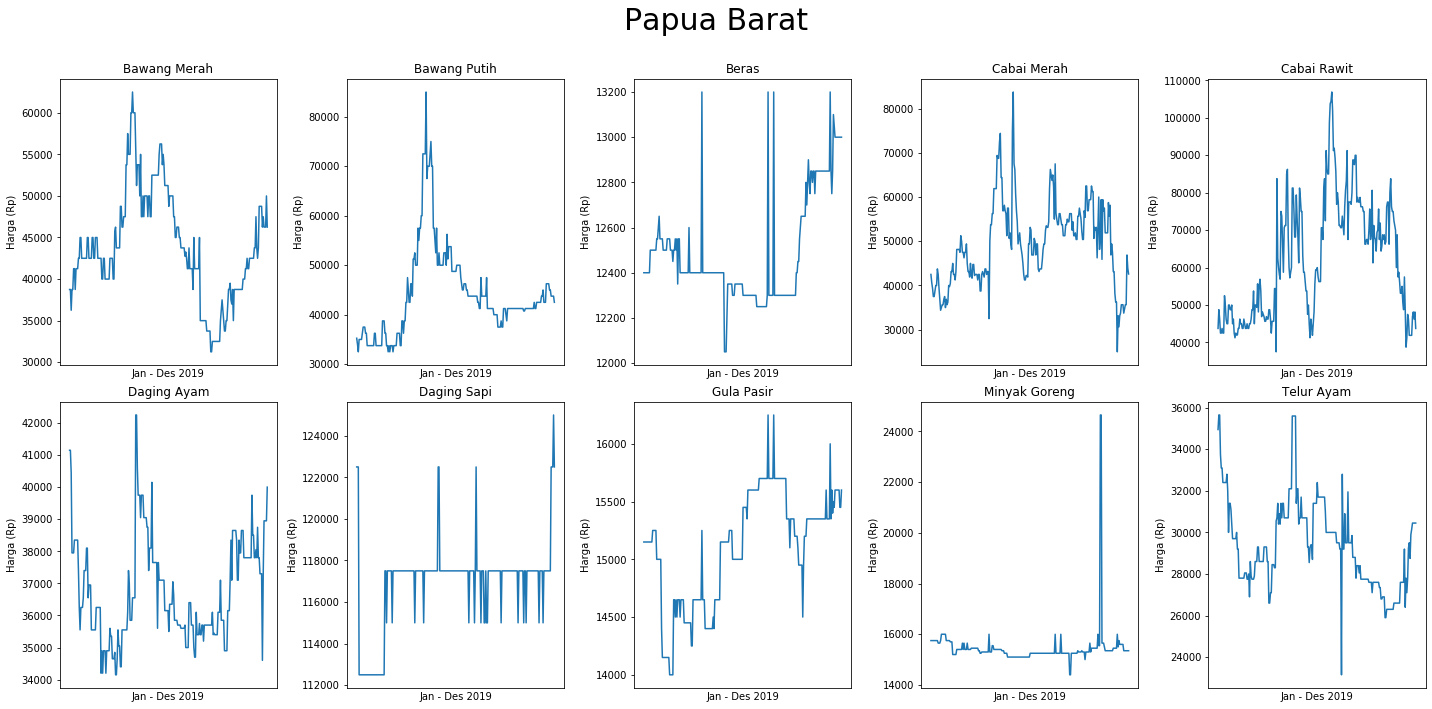

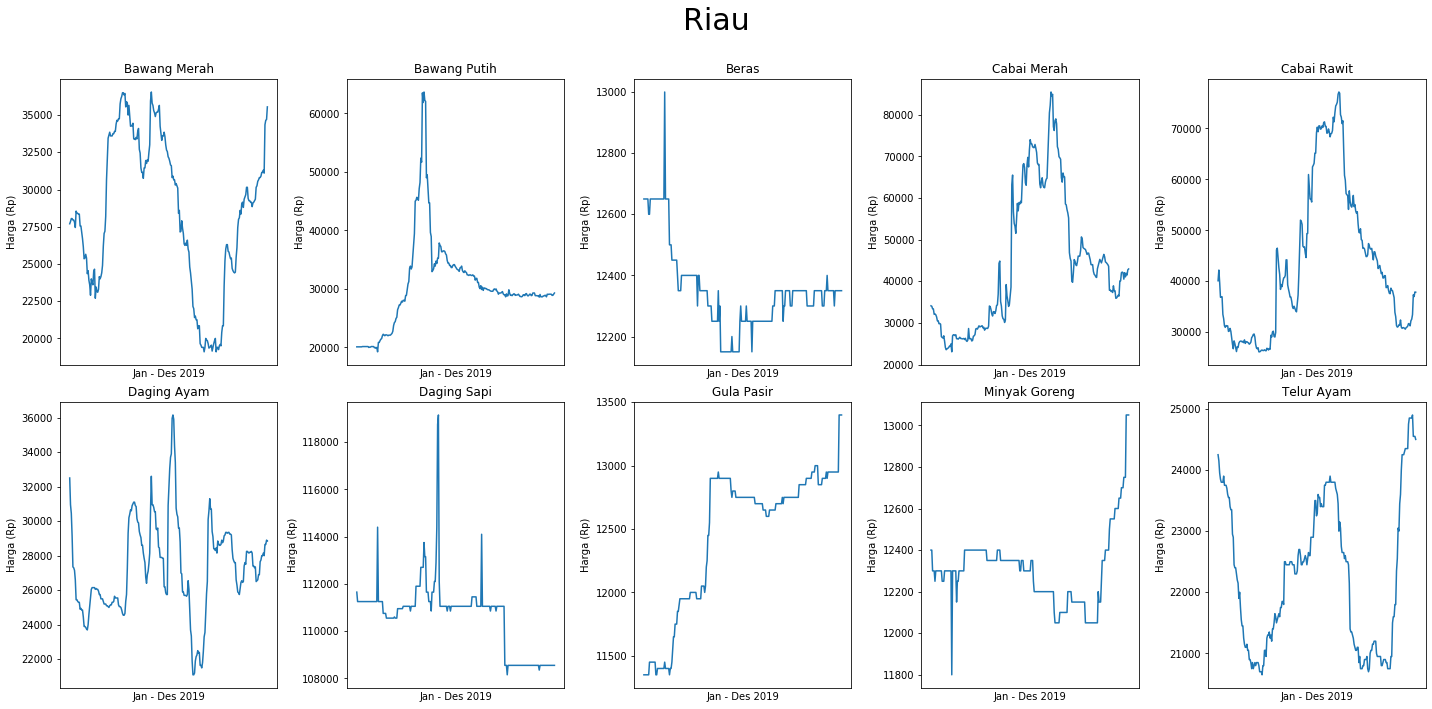

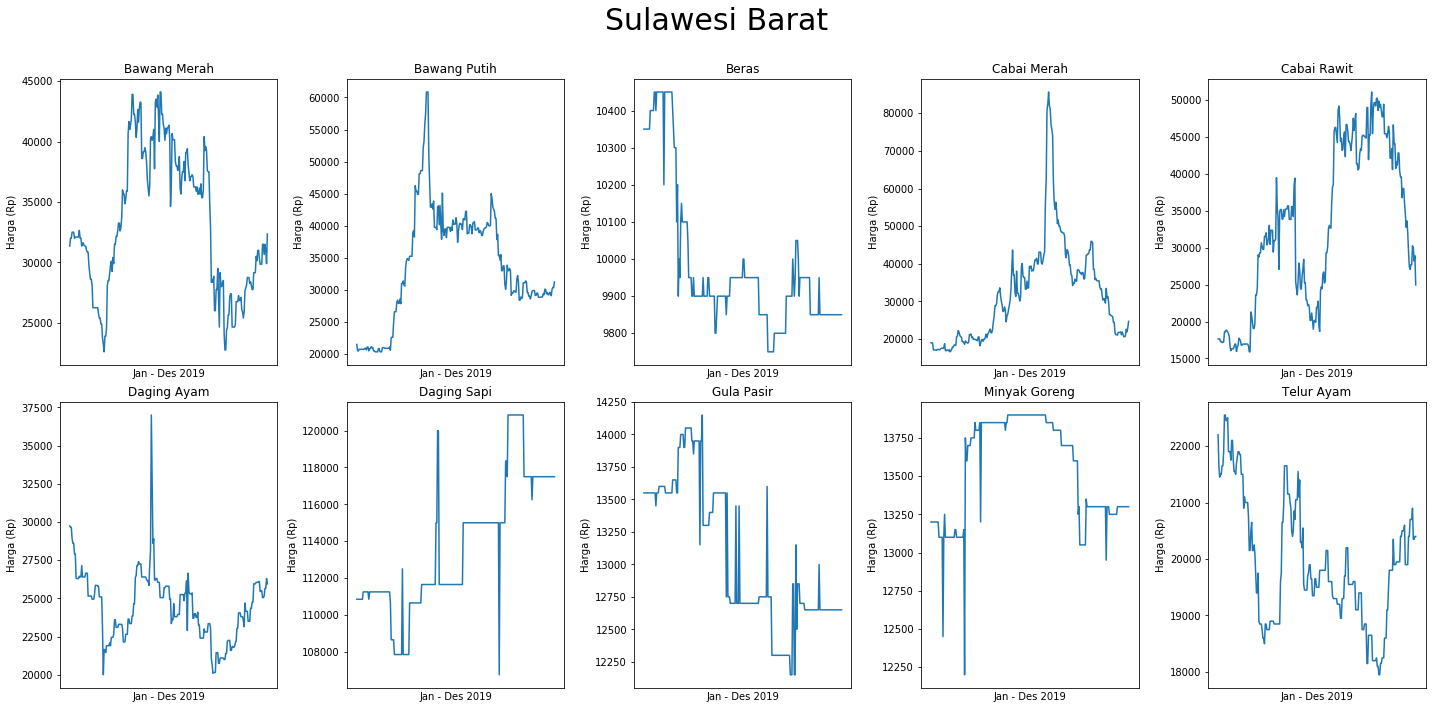

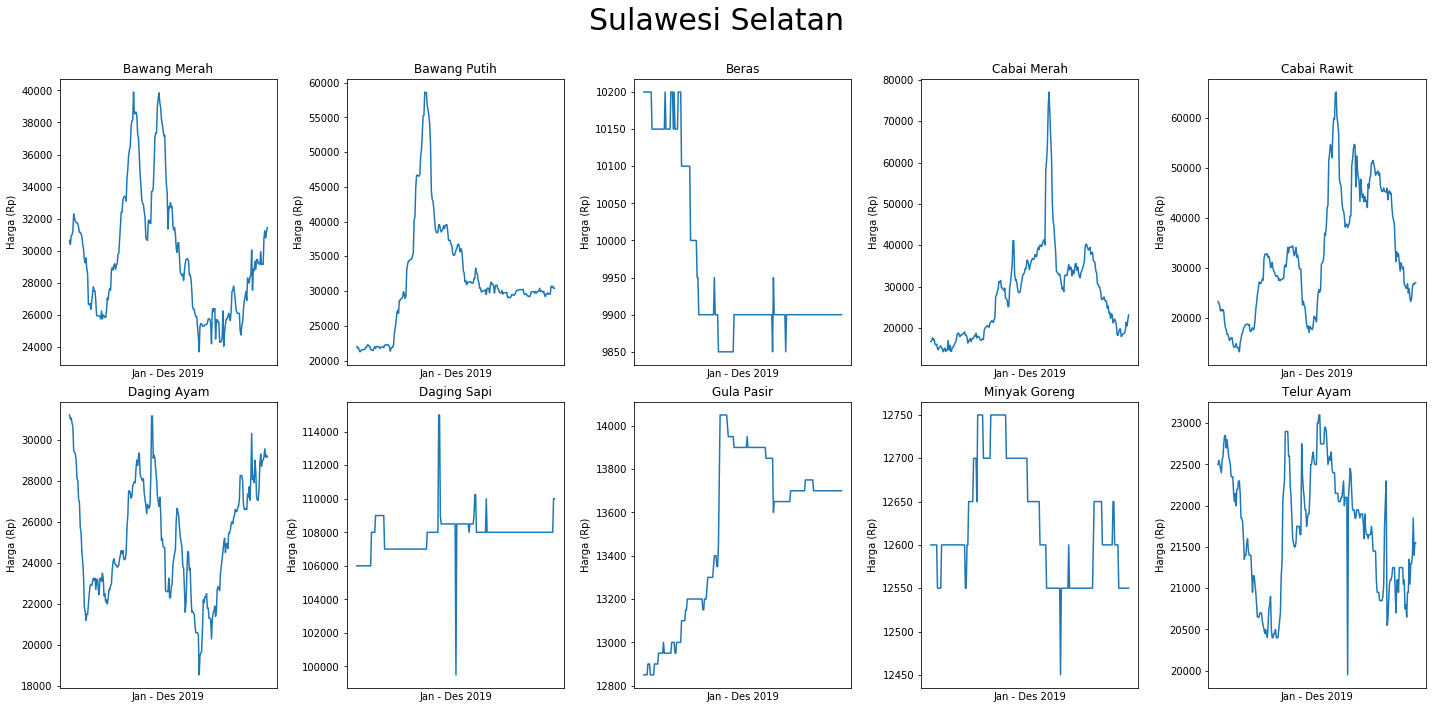

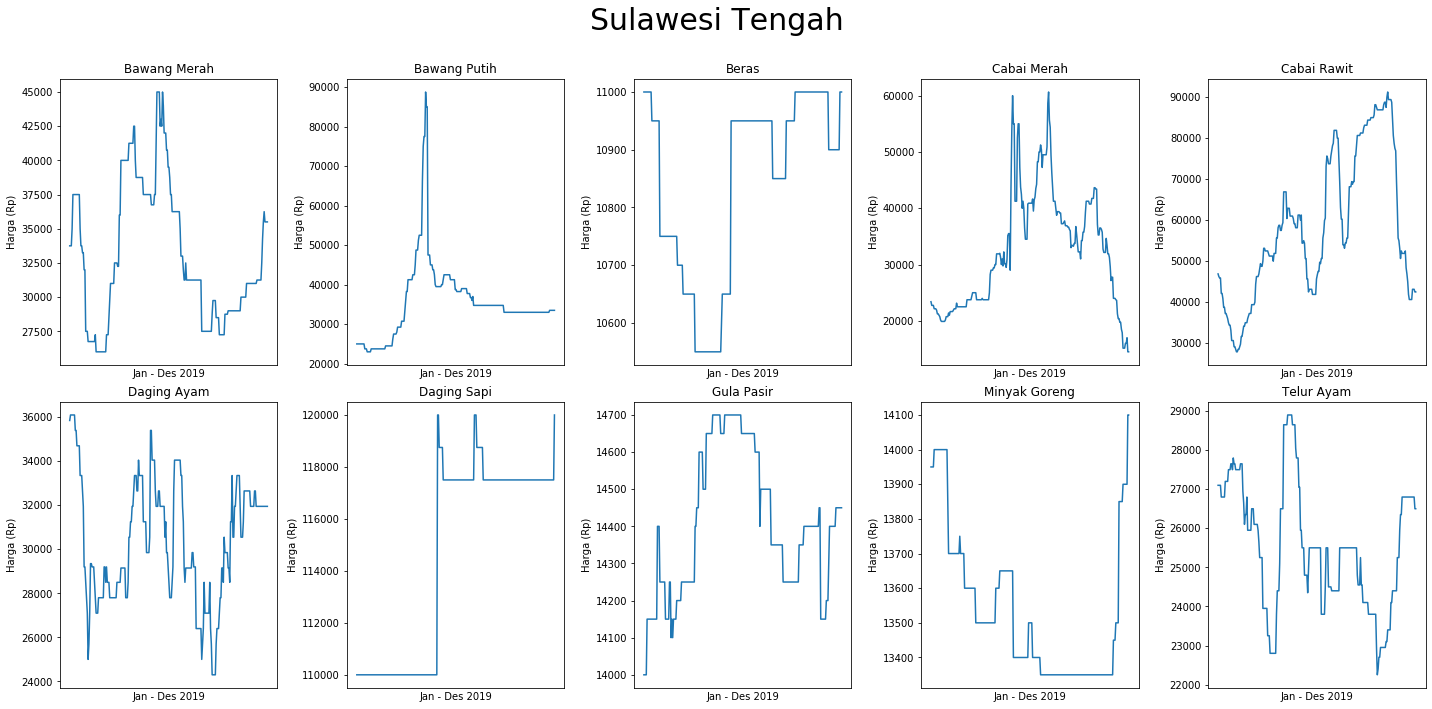

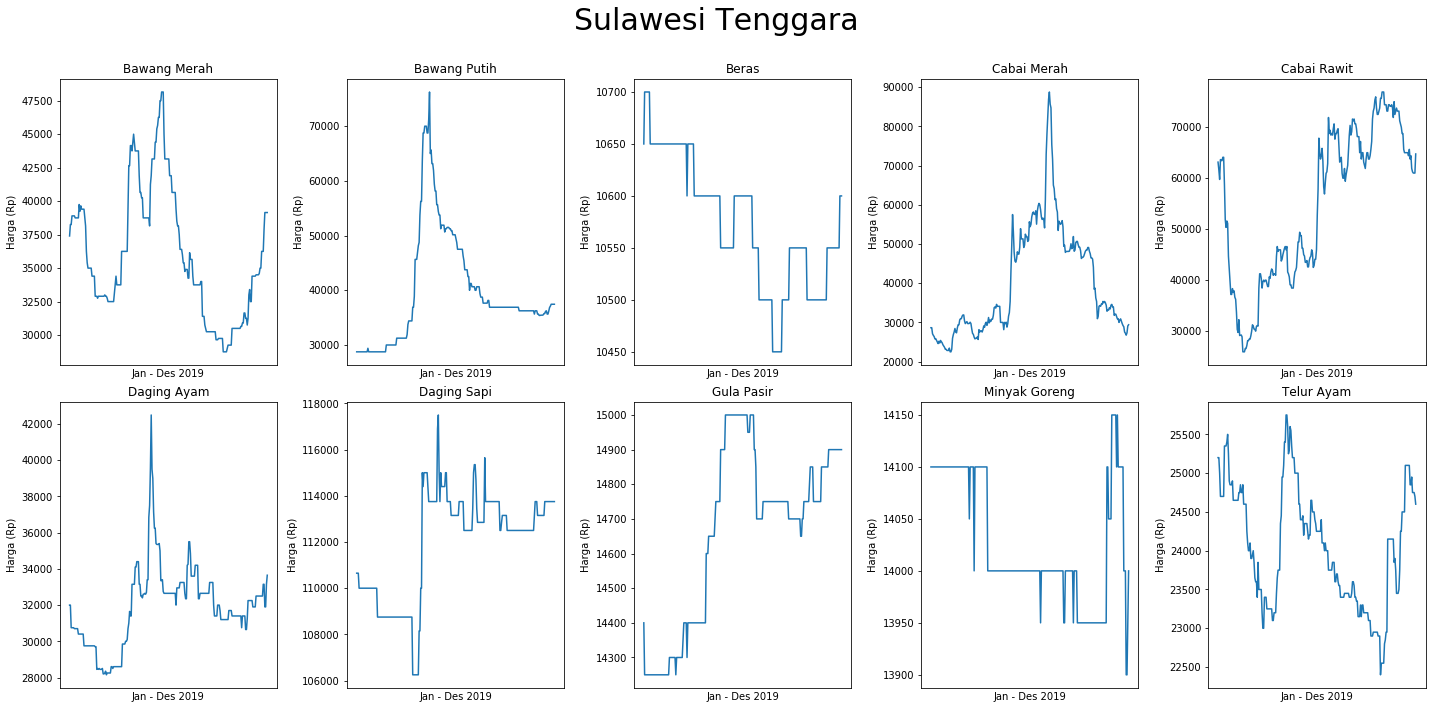

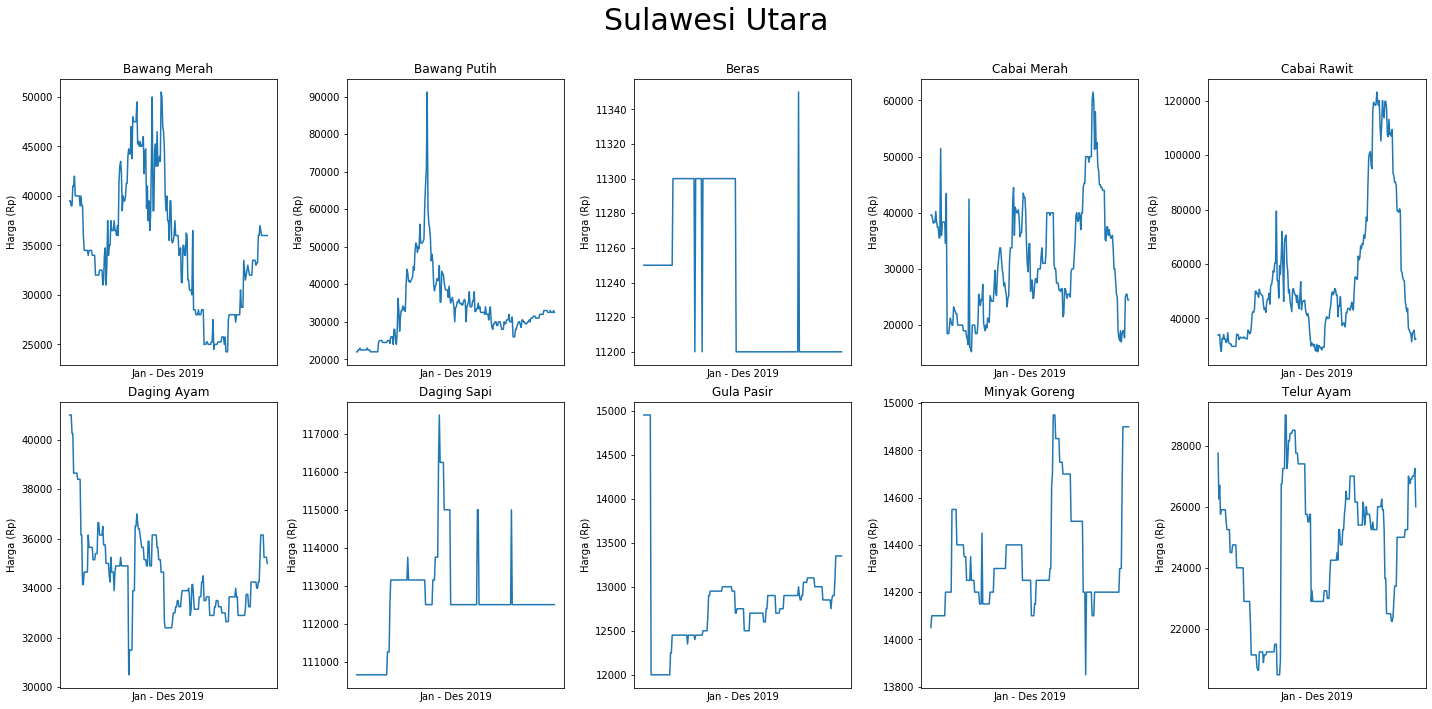

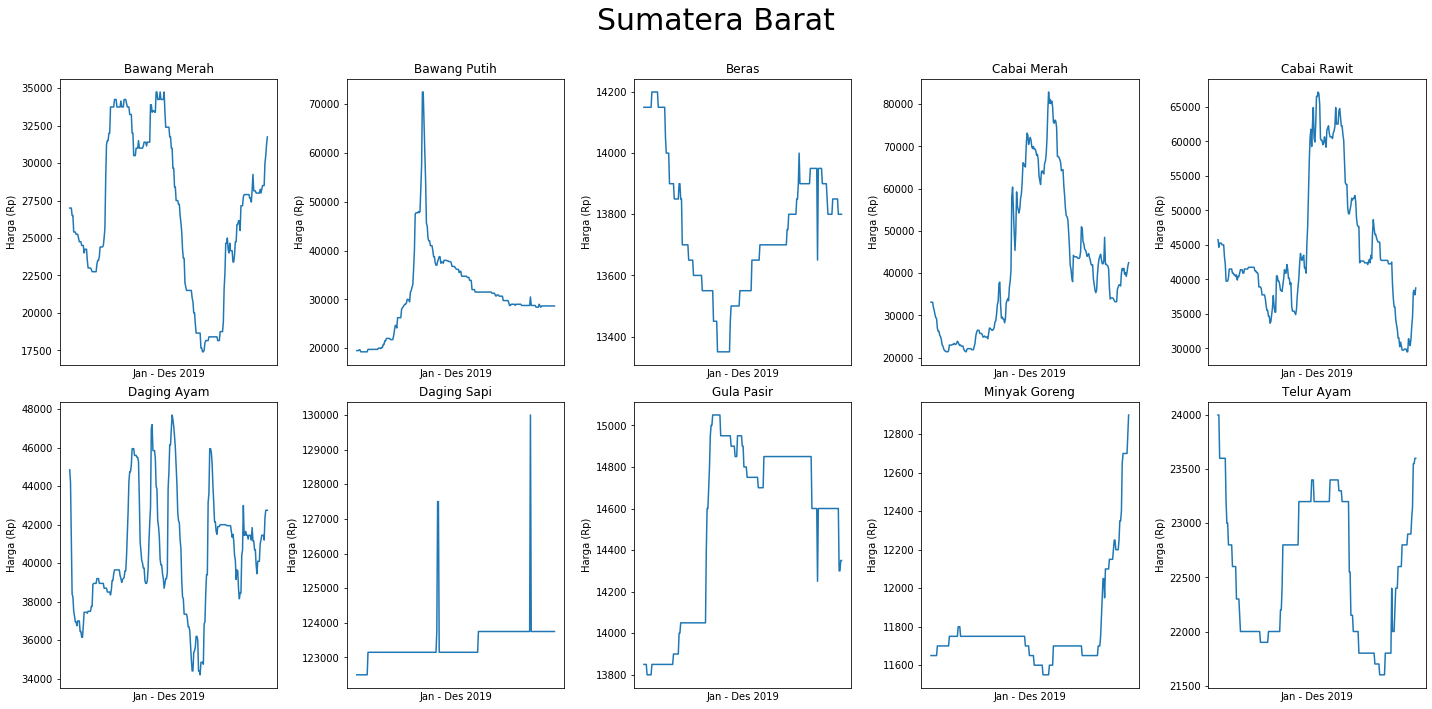

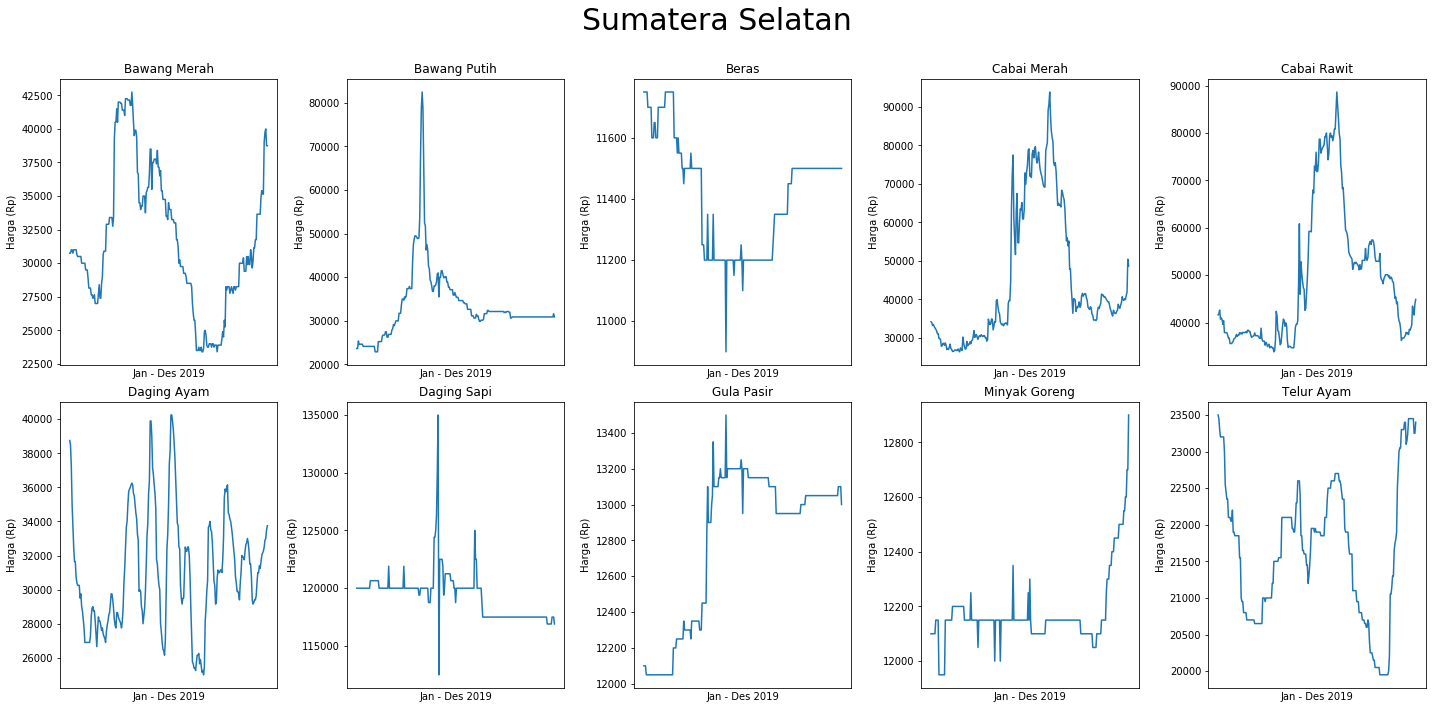

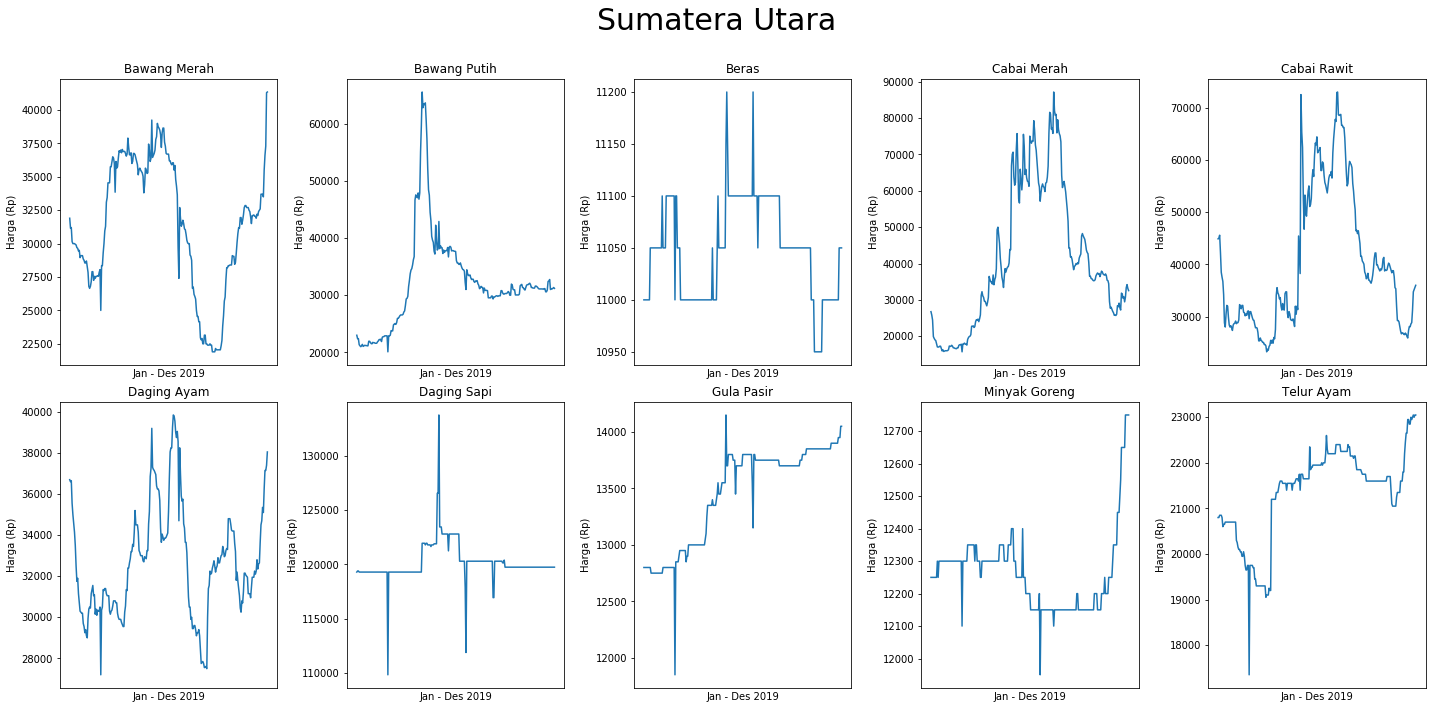

In [15]:
#line plot
list_daerah = ['aceh', 'bali', 'banten', 'bengkulu', 'diy', 'dki_jakarta', 'gorontalo', 'jabar', 'jambi', 'jateng', 'jatim', 
              'kalbar', 'kalsel', 'kalteng', 'kaltim', 'kalut', 'kepri', 'kepulauan_bangka_belitung', 'lampung', 'maluku',
               'malut', 'ntb', 'ntt', 'papua', 'papua_barat', 'riau', 'sulbar', 'sulsel', 'sulteng', 'sultra', 'sulut', 
               'sumbar', 'sumsel', 'sumut']
list_daerah2 = ['Aceh', 'Bali', 'Banten', 'Bengkulu', 'Daerah Istimewa Yogyakarta', 'DKI Jakarta', 'Gorontalo', 'Jawa Barat', 
                'Jambi', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 
                'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Riau', 'Kepulauan Bangka Belitung', 'Lampung', 'Maluku',
               'Maluku Utara', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau', 
                'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara', 
                'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara']

list_ax = [0, 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6', 'ax7', 'ax8', 'ax9', 'ax10']
columns_df = [0, 'Bawang Merah', 'Bawang Putih', 'Beras', 'Cabai Merah',
       'Cabai Rawit', 'Daging Ayam', 'Daging Sapi', 'Gula Pasir',
       'Minyak Goreng', 'Telur Ayam']
figure_o = ['fig', 'fig1', 'fig2', 'fig3', 'fig4', 'fig5', 'fig6', 'fig7', 'fig8', 'fig9', 'fig10', 'fig11', 'fig12', 'fig13',
            'fig14', 'fig15', 'fig16', 'fig17', 'fig18', 'fig19', 'fig20', 'fig21', 'fig22', 'fig23', 'fig24', 'fig25', 'fig26', 'fig1',
            'fig27', 'fig28', 'fig29', 'fig30', 'fig31', 'fig32', 'fig33']
for a in range(len(all_data_frame_pivot)):
    figure_o[a] = plt.figure(figsize=(20, 10))
    figure_o[a].suptitle(list_daerah2[a], fontsize=30)
    figure_o[a].subplots_adjust(top=0.8)
    for i in range(1, 11):
        list_ax[i] = plt.subplot(2, 5, i)
        plt.plot(range(len(all_data_frame_pivot[list_daerah[a]])), all_data_frame_pivot[list_daerah[a]][columns_df[i]])
    #list_ax[i].set_xticks(range(52))
    #list_ax[i].set_xticklabels(range(1, 13))
        plt.ylabel('Harga (Rp)')
        plt.title(columns_df[i])
        plt.xticks(rotation=90)
        plt.xlabel('Jan - Des 2019')
        plt.xticks([])
        plt.subplots_adjust(top=0.946, bottom=0.059, left=0.059, right=0.989, hspace=0.228, wspace=0.556)
        plt.tight_layout()
        
    figure_o[a].tight_layout()
    figure_o[a].subplots_adjust(top=0.88)
    plt.savefig(list_daerah2[a] + '.png')
    plt.show()